In [503]:
from astropy.io import fits as pyfits
from astropy import units as u

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from glob import glob

The list of files I intend to use 
Solar Low Res: solar_low.00000001.fit
Hg Low Res: hg_low.00000008.fit
Hg_400 high res: hg_400.00000005.fit
Sol_400 high res: solar_400.00000005.FIT
Hg_440 high res: hg_440.00000007.fit
Sol_440 high res: Sol_440.00000006.FIT
Hg_480 high res: hg_480.00000009.fit
Sol_480 high res: solar_480.00000011.fit
Hg_520 high res: hg_520.00000013.fit
Sol_520 high res: solar_520.00000012.FIT
Hg_560 high res: hg_560.00000014.fit
Sol_560 high res: solar_560.00000015.fit
Hg_600 high res: hg_600.00000018.fit
Sol_600 high res: solar_600.00000016.fit
Hg_640 high res: hg_640.00000020.FIT
Sol_640 high res: solar_640.00000022.FIT
Hg_680 high res: hg_680.00000024.FIT
Sol_680 high res: solar_680.00000023.FIT

The list of spectral lines for the Sun

In [504]:
SpectrumLoResFiles = {"Sun" : "/Users/shashank/SpectroscopyFolder/solar_low.00000001.FIT",
                          "Hg"  : "/Users/shashank/SpectroscopyFolder/hg_low.00000002.FIT"}

SpectrumHiResFiles = {"Sun" : {4.0: "/Users/shashank/SpectroscopyFolder/solar_400.00000005.FIT",
                               4.4: "/Users/shashank/SpectroscopyFolder/solar_440.00000006.FIT", 
                               4.8: "/Users/shashank/SpectroscopyFolder/solar_480.00000011.FIT",
                               5.2: "/Users/shashank/SpectroscopyFolder/solar_520.00000012.FIT", 
                               5.6: "/Users/shashank/SpectroscopyFolder/solar_560.00000015.FIT", 
                               6.0: "/Users/shashank/SpectroscopyFolder/solar_600.00000016.FIT",
                               6.4: "/Users/shashank/SpectroscopyFolder/solar_640.00000022.FIT", 
                               6.8: "/Users/shashank/SpectroscopyFolder/solar_680.00000023.FIT"},
                          "Hg"  : {4.0: "/Users/shashank/SpectroscopyFolder/hg_400.00000004.FIT",
                                   4.4: "/Users/shashank/SpectroscopyFolder/hg_440.00000007.FIT",
                                   4.8: "/Users/shashank/SpectroscopyFolder/hg_480.00000009.FIT", 
                                   5.2: "/Users/shashank/SpectroscopyFolder/hg_520.00000013.FIT",
                                   5.6: "/Users/shashank/SpectroscopyFolder/hg_560.00000014.FIT", 
                                   6.0: "/Users/shashank/SpectroscopyFolder/hg_600.00000018.FIT",
                                   6.4: "/Users/shashank/SpectroscopyFolder/hg_640.00000020.FIT", 
                                   6.8: "/Users/shashank/SpectroscopyFolder/hg_680.00000024.FIT"}}
Micrometer = [4.0, 4.4, 4.8, 5.2, 5.6, 6.0, 6.4, 6.8]

In [505]:
def spectrum(img_data, row_min, row_max):
    return np.flip(np.average(img_data[row_min:row_max,:], axis=0))

def get_model(model_filename):
    model_obj = pyfits.open(model_filename)
    model=model_obj[1].data
    model_lambda = 10**(model.field(0))#    datafilename = 'G2_+0.0_Dwarf.fits'
    model_flux = model.field(1)
    return(model_lambda,model_flux)

Hg_Lo = []
Sun_Lo = []
Hg_Lo_hdu = pyfits.open(SpectrumLoResFiles['Hg'])
Sun_Lo_hdu = pyfits.open(SpectrumLoResFiles['Sun'])
Hg_Lo_data = Hg_Lo_hdu[0].data
Sun_Lo_data = Sun_Lo_hdu[0].data
Hg_Lo.append(spectrum(Hg_Lo_data, 250, 260))
Sun_Lo.append(spectrum(Sun_Lo_data, 250,260))

Hg_spectra = []
Sun_spectra = []
for microm in Micrometer:
    Hg_hdu = pyfits.open(SpectrumHiResFiles['Hg'][microm])
    Sun_hdu = pyfits.open(SpectrumHiResFiles['Sun'][microm])
    Hg_spec_data = Hg_hdu[0].data
    Sun_spec_data = Sun_hdu[0].data
    Hg_spectra.append(spectrum(Hg_spec_data, 250, 260))
    Sun_spectra.append(spectrum(Sun_spec_data, 250, 260))

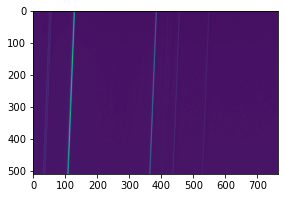

In [506]:
hdu = pyfits.open(SpectrumLoResFiles['Hg'])
image_hdu = hdu[0]
spec_data = image_hdu.data
plt.imshow(spec_data)

## 4.0 mm Micrometer setting

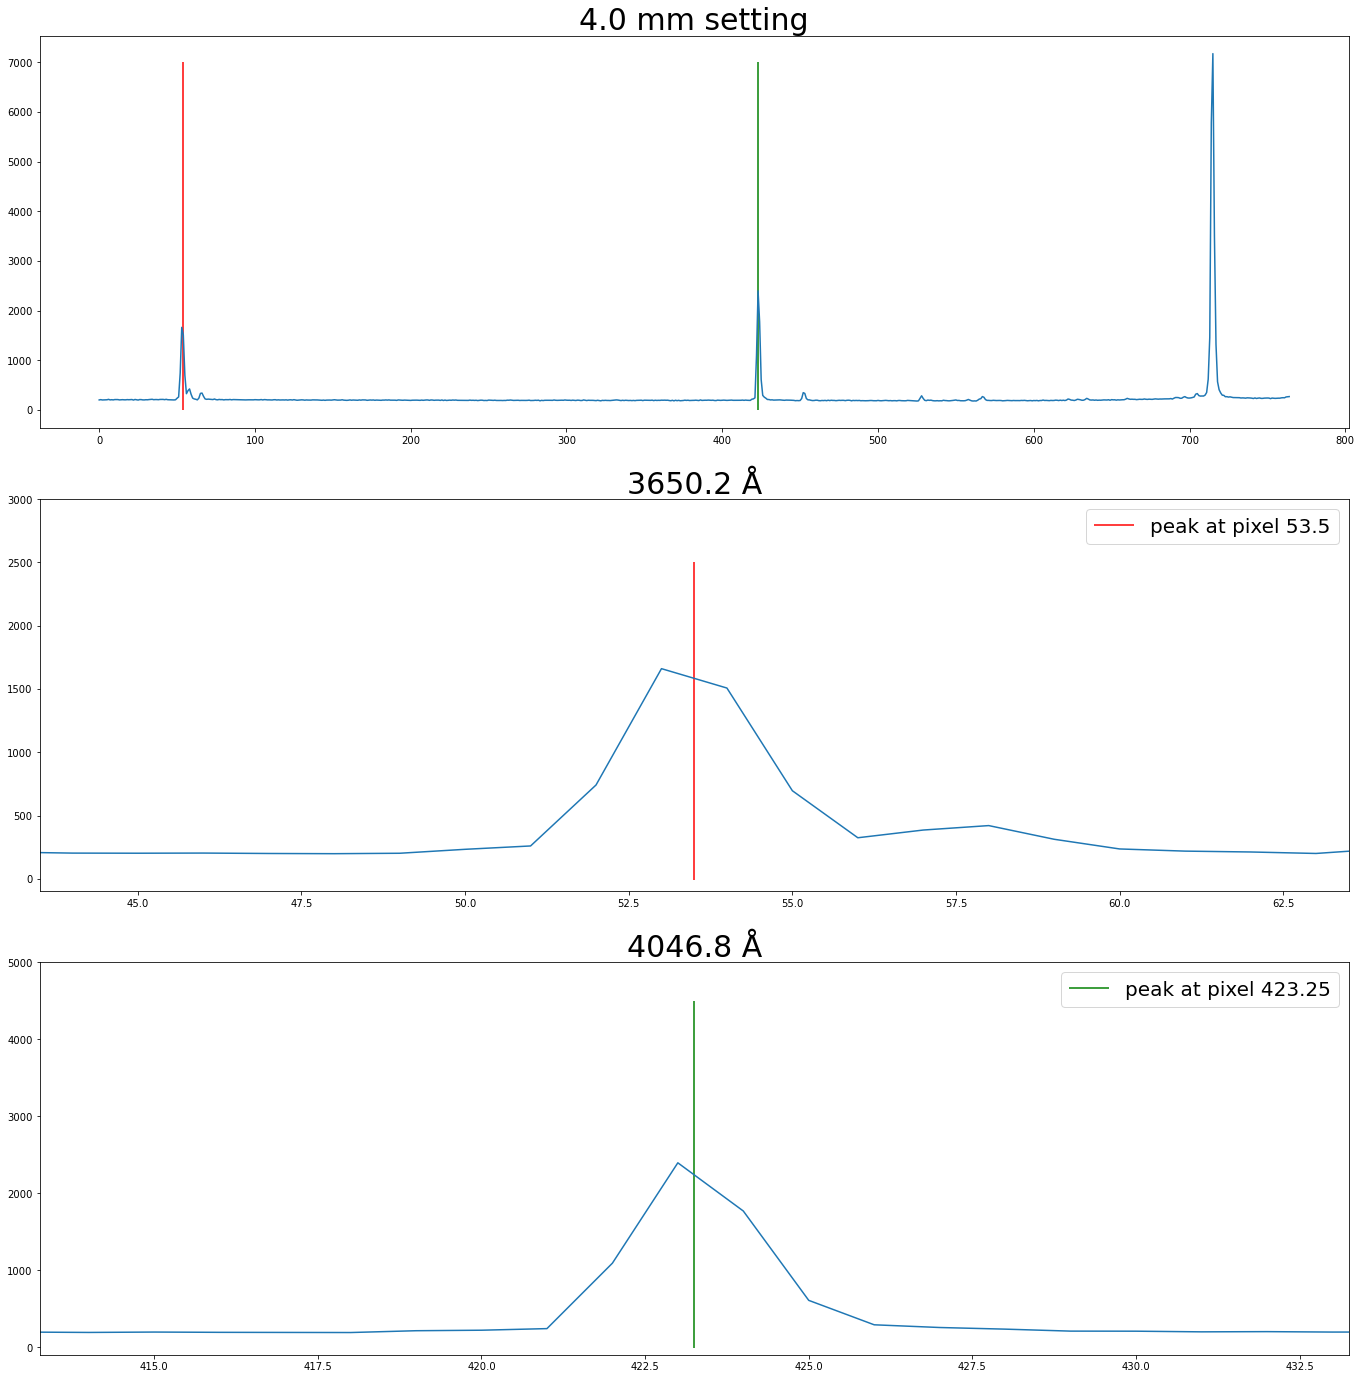

a is : 1.0726166328600415 , b is: 3592.8150101419874
The spectrum runs from 3592.8150101419874 Å to 4412.2941176470595 Å


In [508]:
#Trying high res 4.0 µm setting 
data = Hg_spectra[0]
#pixels
p1 = 53.5
p2 = 423.25
#wavelengths from table 
line1 = 3650.2
line2 = 4046.8

fig, (ax0, ax1, ax2) = plt.subplots(3,1, figsize = (20, 20))
fig.tight_layout(pad=5)
ax0.plot(data); ax0.set_title(f'{Micrometer[0]} mm setting', fontsize = 30)
ax0.vlines([p1, p2], -10, 7000, colors = ['r', 'g'])
#zoomed plot on line 1
ax1.plot(data) ; ax1.set_title(f'{line1} Å', fontsize=30)
ax1.vlines(p1, -10, 2500, label=f'peak at pixel {p1}', colors='r')
ax1.set_xlim(p1-10, p1+10)
ax1.set_ylim(-100, 3000)
#zoomed plot on line 2
ax2.plot(data) ; ax2.set_title(f'{line2} Å', fontsize=30)
ax2.vlines(p2, -10, 4500, label= f'peak at pixel {p2}', colors='g')
ax2.set_xlim(p2-10, p2+10)
ax2.set_ylim(-100, 5000)

ax1.legend(fontsize = 20)
ax2.legend(fontsize = 20)
plt.show()
#calculation
a = (line1 - line2)/(p1-p2)
b = line1 - a*p1
print (f'a is : {a} , b is: {b}')
#pixels to wavelength calibration
pixelvalues = np.arange(len(data))
wavelengthvalues = a*pixelvalues+b
print(f'The spectrum runs from \033[1m{np.amin(wavelengthvalues)}\033[0m Å to \033[1m{np.amax(wavelengthvalues)}\033[0m Å') 

 Error on Fraunhofer K is 0.0017639039730603723 % or 0.06999999999970896 Å
 Error on Fraunhofer H is 0.008643349959074896 % or 0.3400000000001455 Å


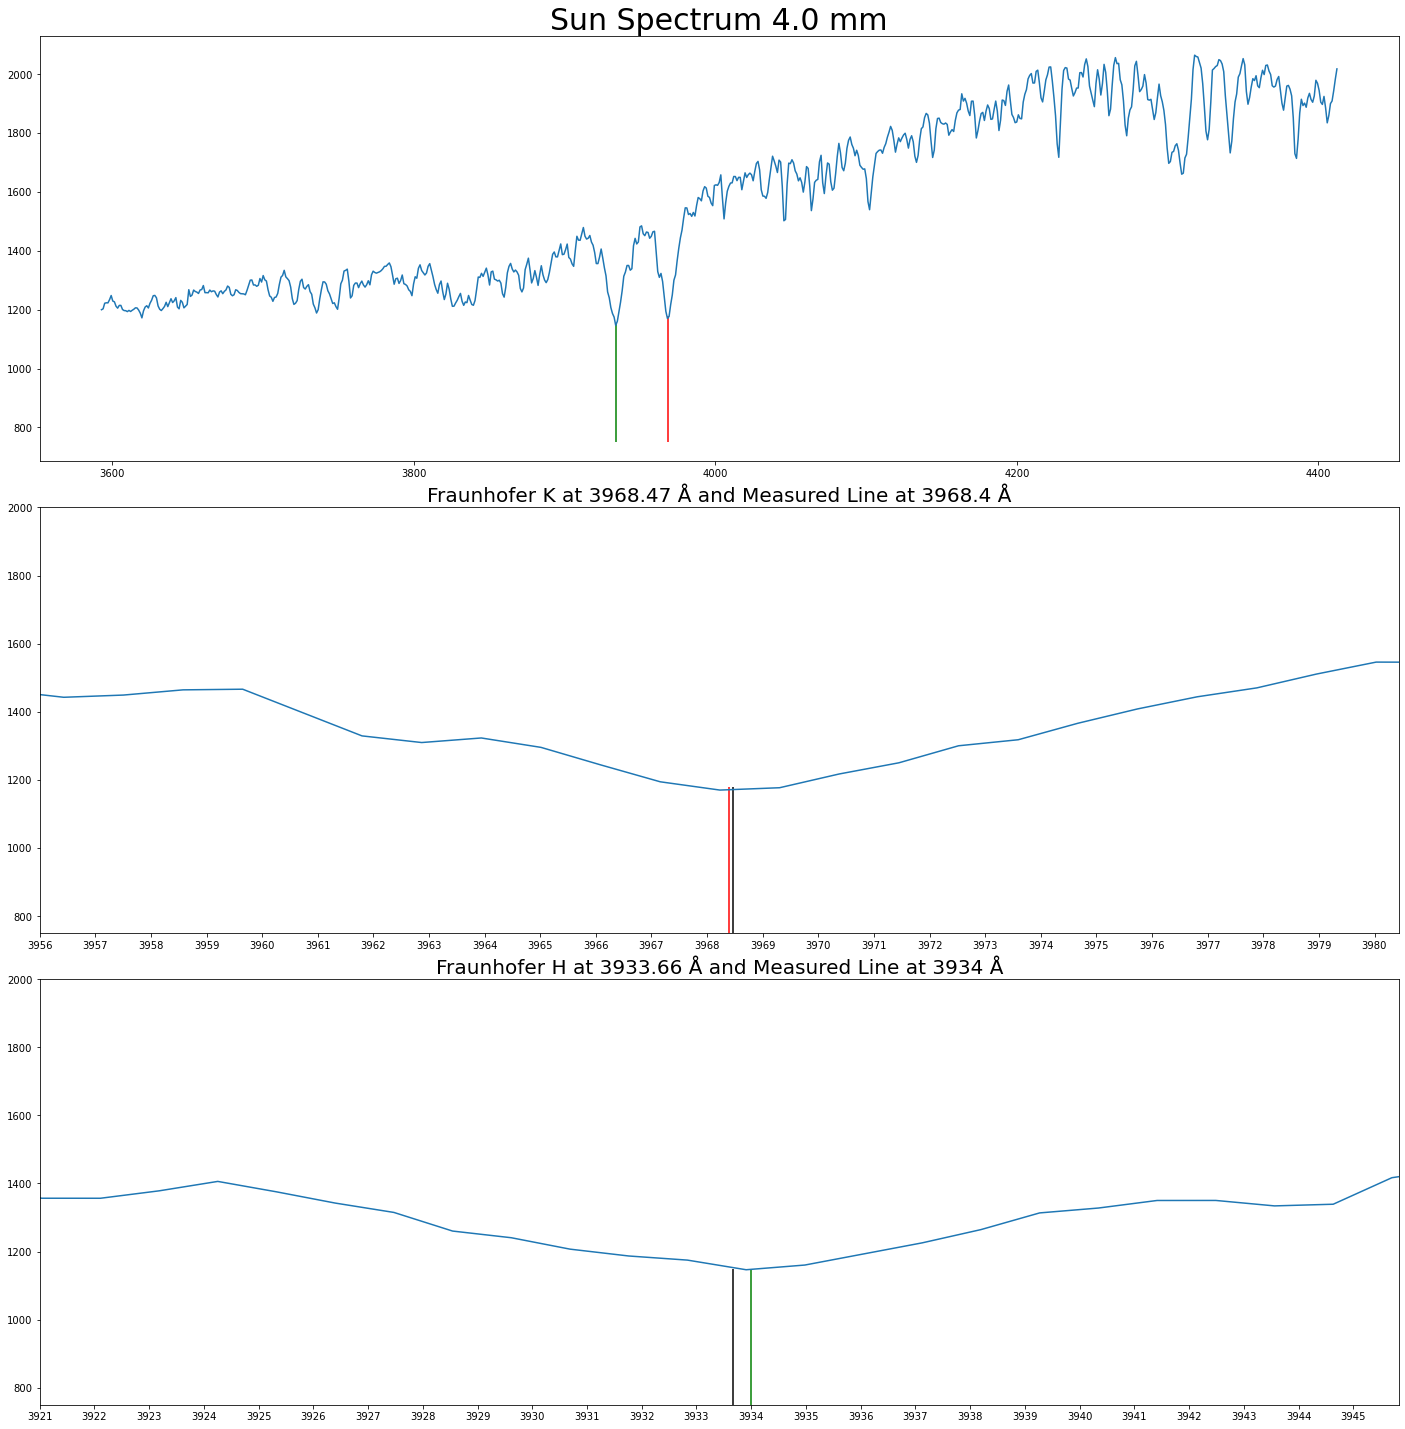

In [509]:
#Calibration of the Sun at 4.4 mm setting
data = Sun_spectra[0]

obs_line1 = 3968.4
obs_line2 = 3934
spectral1 = 3968.47
spectral2 = 3933.66

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 20))
fig.tight_layout(pad=2.5)
ax0.set_title(f'Sun Spectrum {Micrometer[0]} mm', fontsize=30)
ax0.plot(wavelengthvalues,data)
ax0.vlines(obs_line1, 750, 1180, colors = 'r')
ax0.vlines(obs_line2, 750, 1150, colors = 'g')

ax1.plot(wavelengthvalues,data);
ax1.set_title(f'Fraunhofer K at {spectral1} Å and Measured Line at {obs_line1} Å', fontsize=20)
ax1.vlines(obs_line1, 750, 1180, colors='r')
ax1.vlines(spectral1, 750, 1180, colors='black')
ax1.set_xlim((spectral1+obs_line1)/2 - 12, (spectral1+obs_line1)/2 +12)
ax1.set_xticks(np.arange(25)+int(((spectral1+obs_line1)/2 -12)))
ax1.set_ylim(750, 2000)

ax2.plot(wavelengthvalues,data);
ax2.set_title(f'Fraunhofer H at {spectral2} Å and Measured Line at {obs_line2} Å', fontsize=20)
ax2.vlines(obs_line2, 750, 1150, colors='g')
ax2.vlines(spectral2, 750, 1150, colors='black')
ax2.set_xlim(((spectral2+obs_line2)/2 - 12),((spectral2+obs_line2)/2 +12))
ax2.set_xticks(np.arange(25)+int(((spectral2 + obs_line2)/2-12)))
ax2.set_ylim(750, 2000)

error1 = np.abs(obs_line1-spectral1)
frac_error1 = error1/spectral1 * 100
error2 = np.abs(obs_line2-spectral2)
frac_error2 = error2/spectral2 * 100
print (f' Error on Fraunhofer K is {frac_error1} % or {error1} Å')
print (f' Error on Fraunhofer H is {frac_error2} % or {error2} Å')

plt.show()

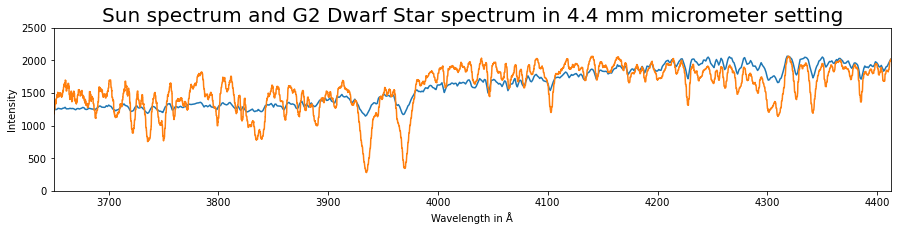

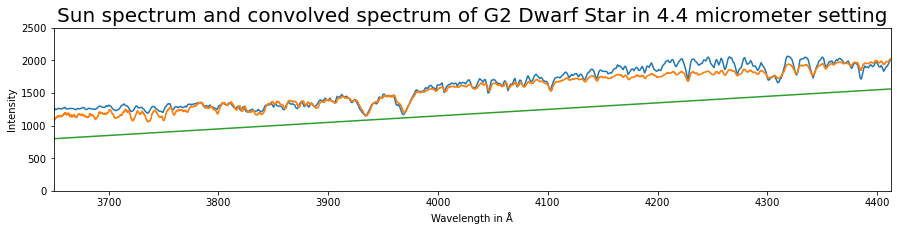

In [511]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/G2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,2500)
plt.title(f'Sun spectrum and G2 Dwarf Star spectrum in {Micrometer[1]} mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1
offset = 800
rescale = 0.23

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(0, 2500)
plt.title(f'Sun spectrum and convolved spectrum of G2 Dwarf Star in {Micrometer[1]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

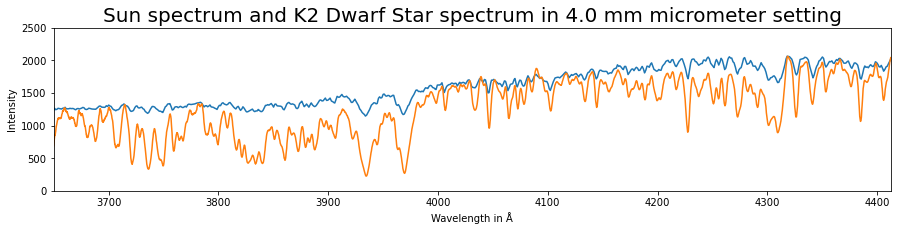

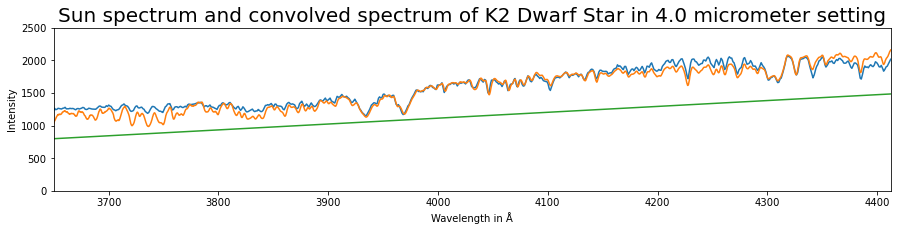

In [518]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/K2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,2500)
plt.title(f'Sun spectrum and K2 Dwarf Star spectrum in {Micrometer[0]} mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 0.9
offset = 800
rescale = 0.33

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(0, 2500)
plt.title(f'Sun spectrum and convolved spectrum of K2 Dwarf Star in {Micrometer[0]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

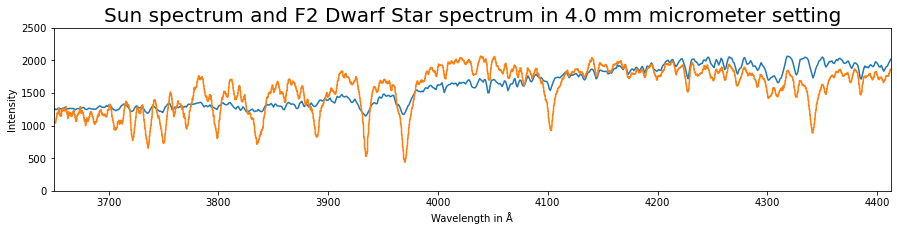

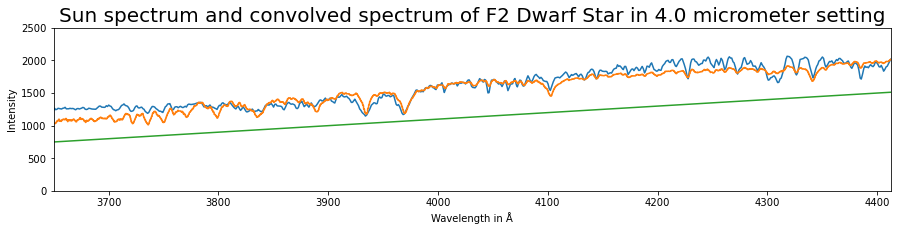

In [534]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/F2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,2500)
plt.title(f'Sun spectrum and F2 Dwarf Star spectrum in {Micrometer[0]} mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1
offset = 750
rescale = 0.27

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(0, 2500)
plt.title(f'Sun spectrum and convolved spectrum of F2 Dwarf Star in {Micrometer[0]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

## 4.4 mm Micrometer Setting

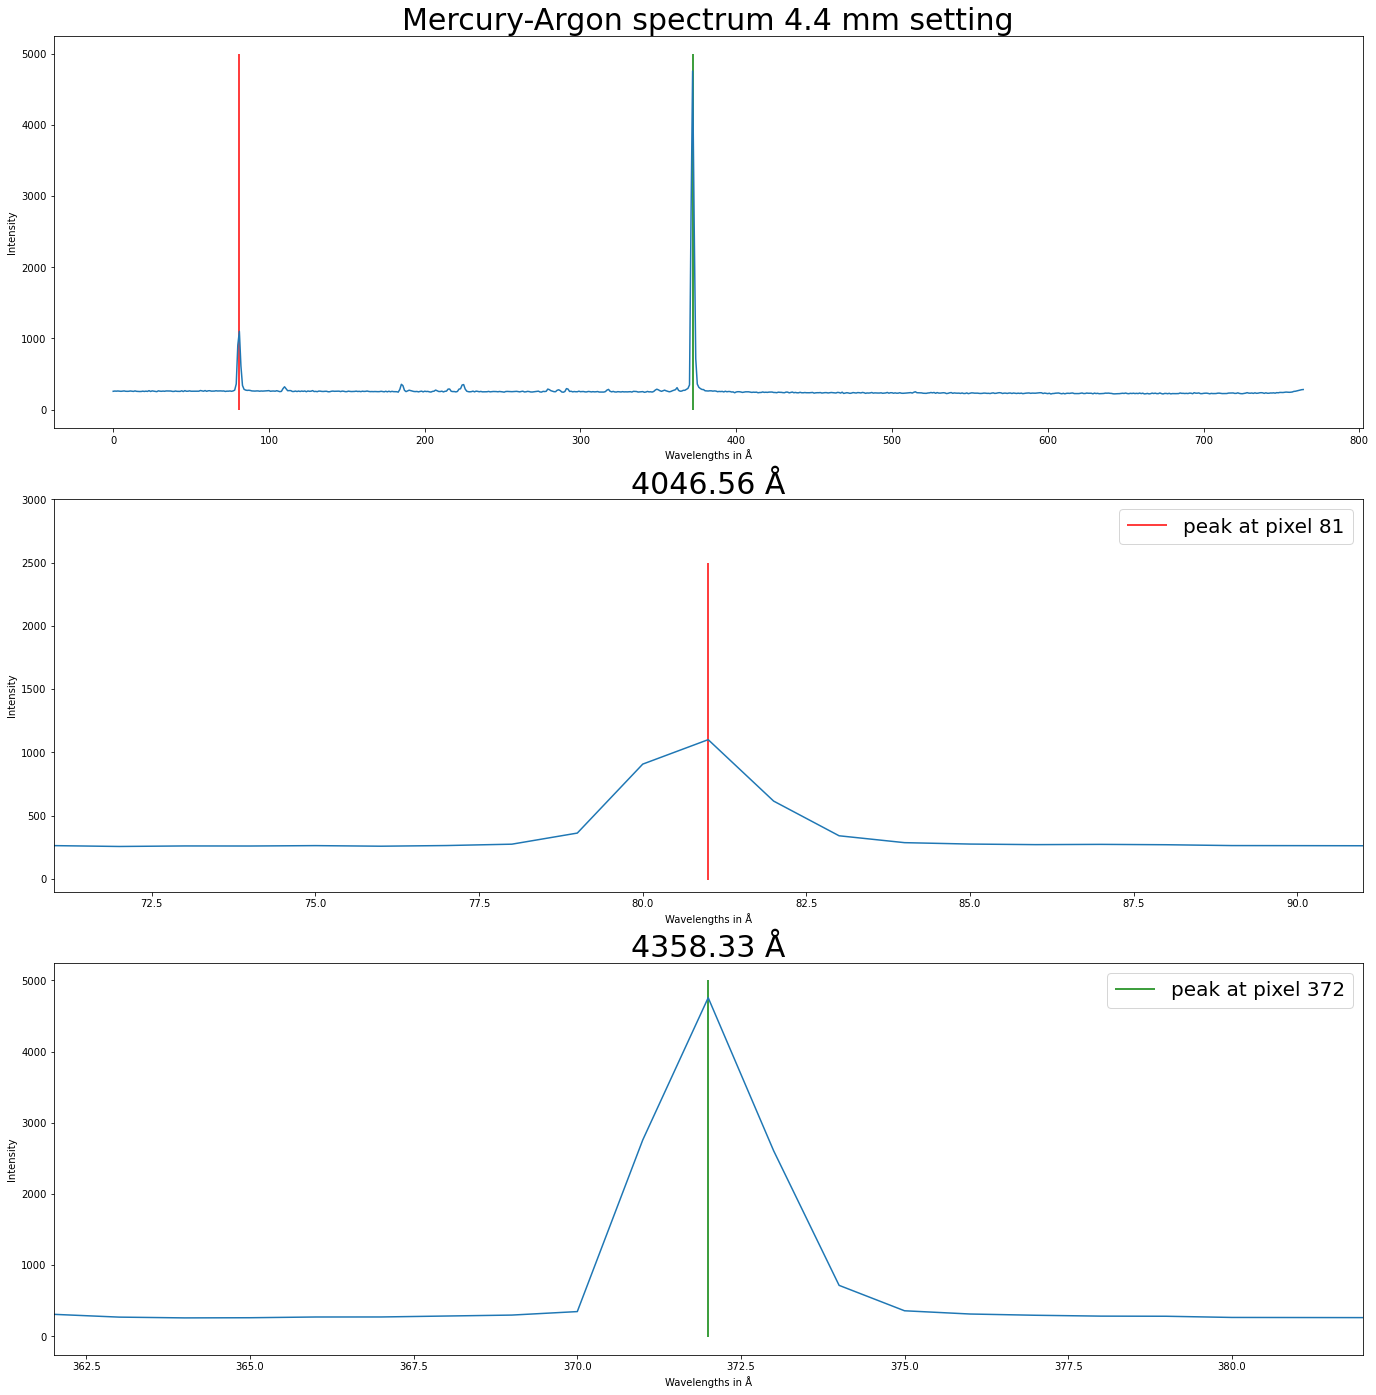

a is : 1.0713745704467352 , b is: 3959.7786597938143
The spectrum runs from 3959.7786597938143 Å to 4778.30883161512 Å


In [430]:
#Calibration for 4.4 mm
data = Hg_spectra[1]
p1 = 81
p2 = 372

line1 = 4046.56
line2 = 4358.33

fig, (ax0, ax1, ax2) = plt.subplots(3,1, figsize = (20, 20))
fig.tight_layout(pad=5)
ax0.plot(data) ; ax0.set_title(f'Mercury-Argon spectrum {Micrometer[1]} mm setting', fontsize = 30)
ax0.vlines([p1, p2], -10, 5000, colors = ['r', 'g'])
ax0.set_xlabel('Wavelengths in Å')
ax0.set_ylabel('Intensity')

ax1.plot(data) ; ax1.set_title(f'{line1} Å', fontsize=30)
ax1.vlines(p1, -10, 2500, label=f'peak at pixel {p1}', colors='r')
ax1.set_xlim(p1-10, p1+10)
ax1.set_ylim(-100, 3000)
ax1.set_xlabel('Wavelengths in Å')
ax1.set_ylabel('Intensity')
ax1.legend(fontsize = 20)

ax2.plot(data) ; ax2.set_title(f'{line2} Å', fontsize=30)
ax2.vlines(p2, -10, 5000, label= f'peak at pixel {p2}', colors='g')
ax2.set_xlim(p2-10, p2+10)
ax2.set_xlabel('Wavelengths in Å')
ax2.set_ylabel('Intensity')
ax2.legend(fontsize = 20)
plt.show()


a = (line1 - line2)/(p1-p2)
b = line1 - a*p1
print (f'a is : {a} , b is: {b}')

pixelvalues = np.arange(len(data))
wavelengthvalues = a*pixelvalues+b
print(f'The spectrum runs from \033[1m{np.amin(wavelengthvalues)}\033[0m Å to \033[1m{np.amax(wavelengthvalues)}\033[0m Å') 

 Error on Fraunhofer Ca I is 0.003785423281296093 % or 0.15999999999985448 Å
 Error on Fraunhofer Fe I is 0.010105948205993696 % or 0.443000000000211 Å


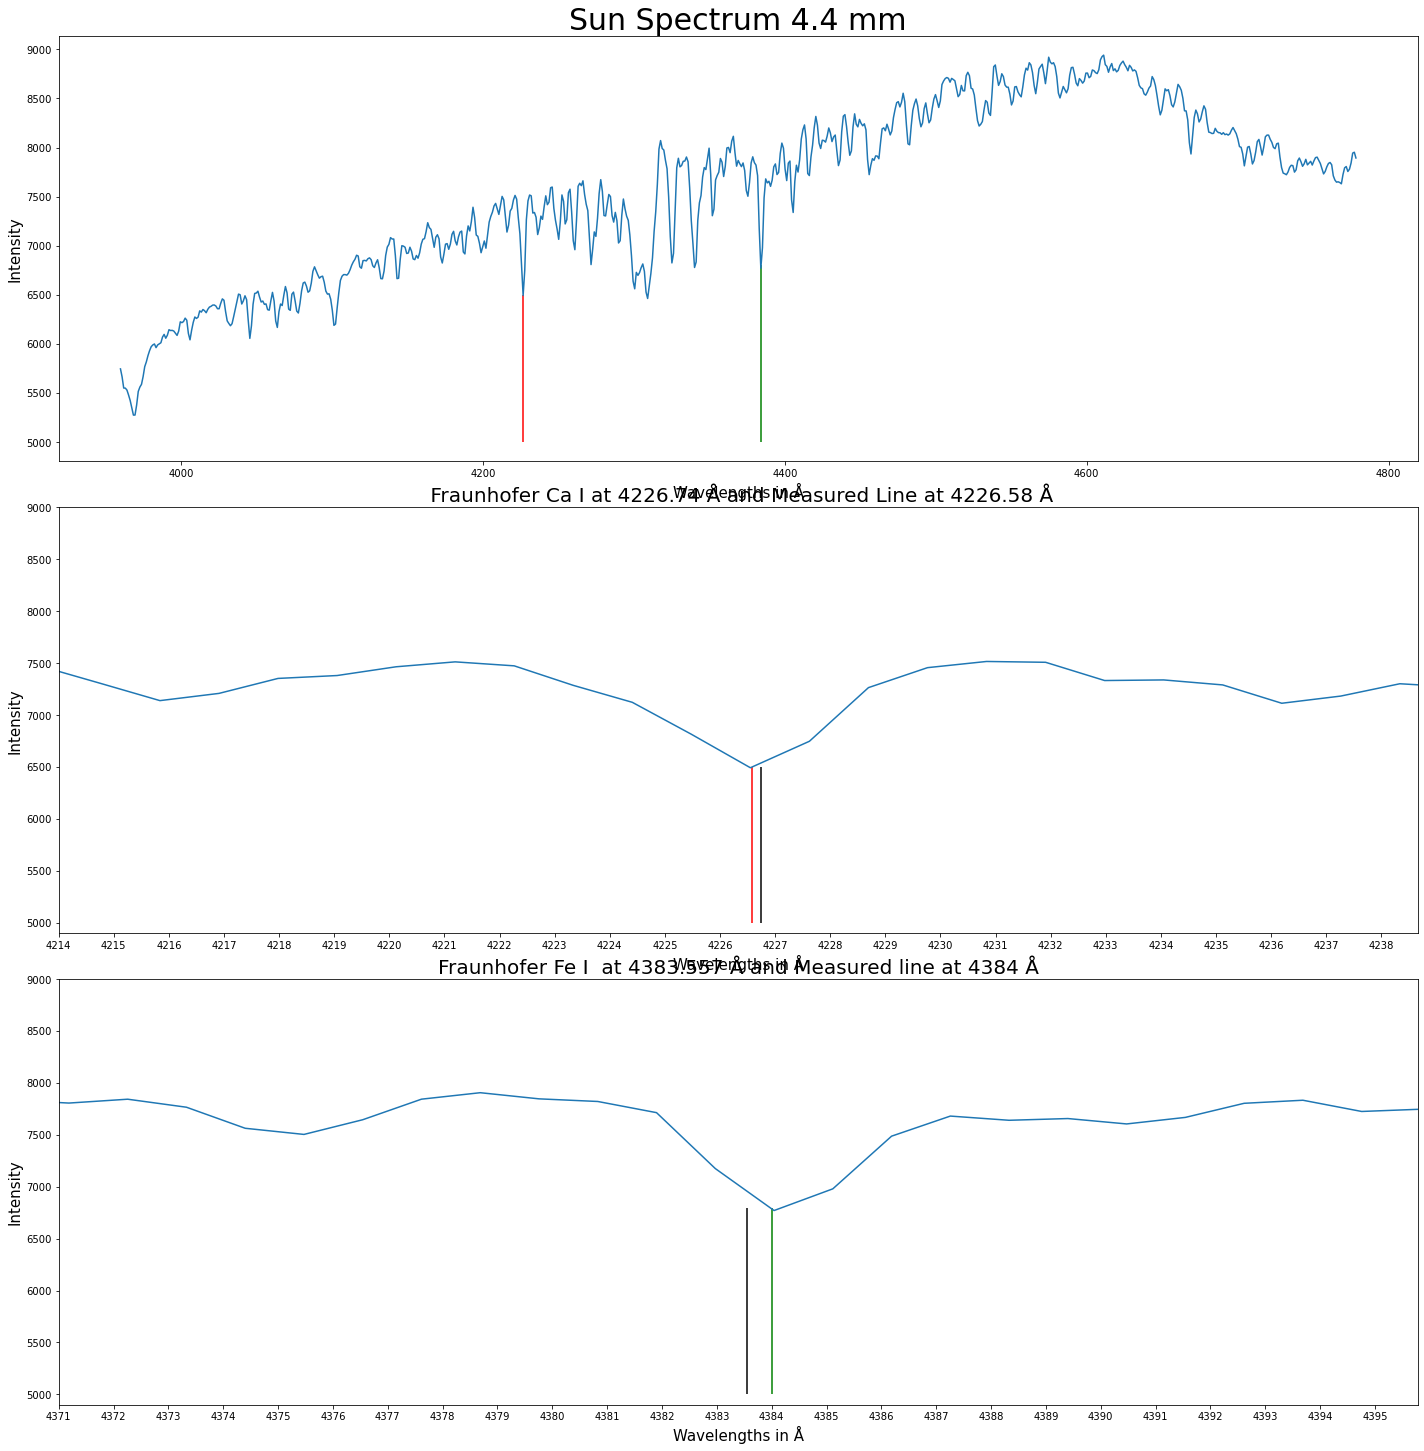

In [431]:
#calibration of the sun in 4.4 mm micrometer setting 
data = Sun_spectra[1]

obs_line1 = 4226.58
obs_line2 = 4384
spectral1 = 4226.740
spectral2 = 4383.557

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 20))
fig.tight_layout(pad=2.5)
ax0.set_title(f'Sun Spectrum {Micrometer[1]} mm', fontsize=30)
ax0.plot(wavelengthvalues,data)
ax0.vlines(obs_line1, 5000, 6500, colors = 'r')
ax0.vlines(obs_line2, 5000, 6800, colors = 'g')
ax0.set_xlabel('Wavelengths in Å', fontsize = 15)
ax0.set_ylabel('Intensity', fontsize = 15)

ax1.plot(wavelengthvalues,data);
ax1.set_title(f' Fraunhofer Ca I at {spectral1} Å and Measured Line at {obs_line1} Å', fontsize=20)
ax1.vlines(obs_line1, 5000, 6500, colors='r')
ax1.vlines(spectral1, 5000, 6500, colors='black')
ax1.set_xlim((spectral1+obs_line1)/2 - 12, (spectral1+obs_line1)/2 +12)
ax1.set_xticks(np.arange(25)+int(((spectral1+obs_line1)/2 -12)))
ax1.set_ylim(4900, 9000)
ax1.set_xlabel('Wavelengths in Å', fontsize = 15)
ax1.set_ylabel('Intensity', fontsize = 15)

ax2.plot(wavelengthvalues,data);
ax2.set_title(f'Fraunhofer Fe I  at {spectral2} Å and Measured line at {obs_line2} Å', fontsize=20)
ax2.vlines(obs_line2, 5000, 6800, colors='g')
ax2.vlines(spectral2, 5000, 6800, colors='black')
ax2.set_xlim(((spectral2+obs_line2)/2 - 12),((spectral2+obs_line2)/2 +12))
ax2.set_xticks(np.arange(25)+int(((spectral2 + obs_line2)/2-12)))
ax2.set_ylim(4900, 9000)
ax2.set_xlabel('Wavelengths in Å', fontsize = 15)
ax2.set_ylabel('Intensity', fontsize = 15)


error1 = np.abs(obs_line1-spectral1)
frac_error1 = error1/spectral1 * 100
error2 = np.abs(obs_line2-spectral2)
frac_error2 = error2/spectral2 * 100
print (f' Error on Fraunhofer Ca I is {frac_error1} % or {error1} Å')
print (f' Error on Fraunhofer Fe I is {frac_error2} % or {error2} Å')

plt.show()

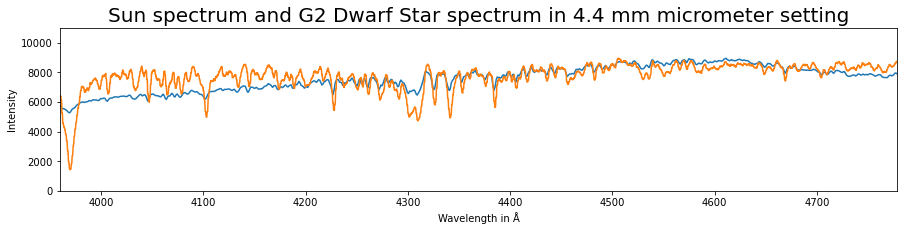

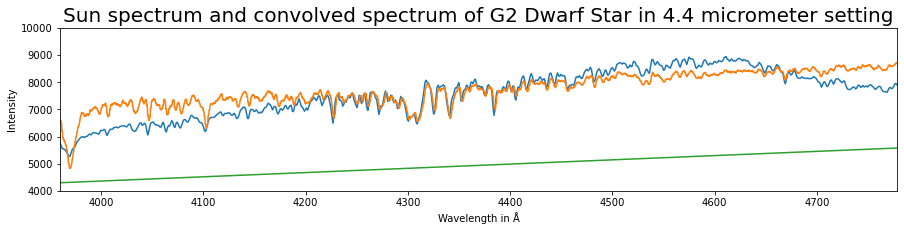

In [432]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/G2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,11000)
plt.title(f'Sun spectrum and G2 Dwarf Star spectrum in {Micrometer[1]} mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.56
offset = 4300
rescale = 0.36

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(4000, 10000)
plt.title(f'Sun spectrum and convolved spectrum of G2 Dwarf Star in {Micrometer[1]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

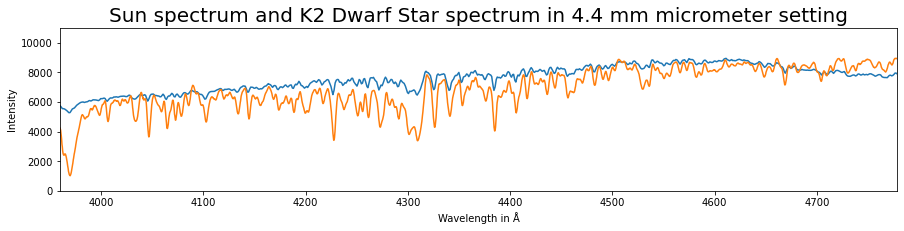

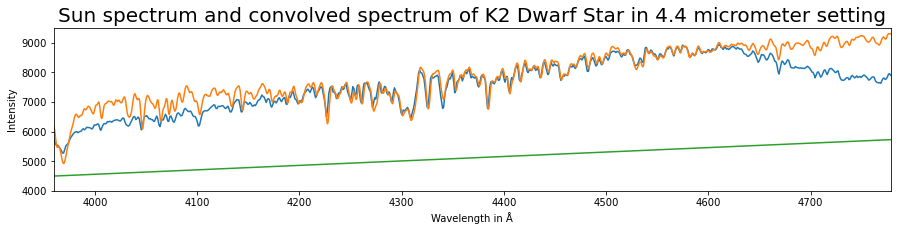

In [442]:
bda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/K2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,11000)
plt.title(f'Sun spectrum and K2 Dwarf Star spectrum in 4.4 mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.50
offset = 4500
rescale = 0.4

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(4000, 9500)
plt.title(f'Sun spectrum and convolved spectrum of K2 Dwarf Star in 4.4 micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

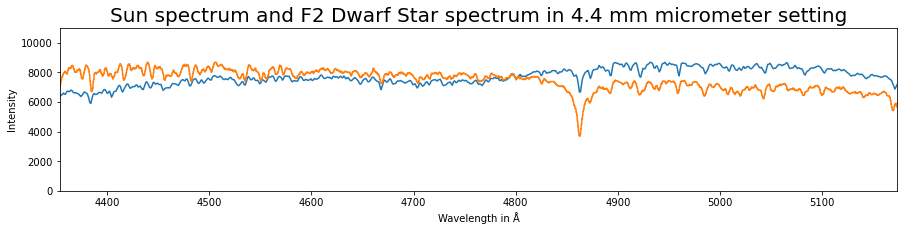

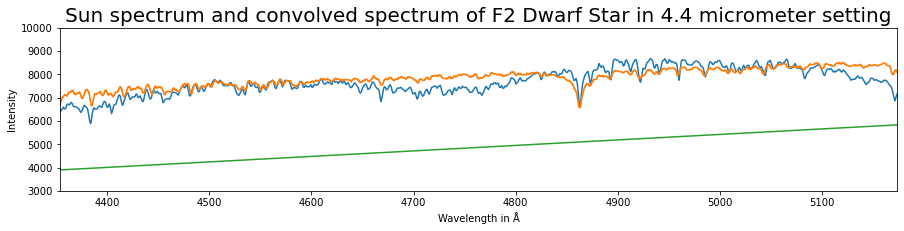

In [499]:
bda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/F2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,11000)
plt.title(f'Sun spectrum and F2 Dwarf Star spectrum in 4.4 mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 2.36
offset = 3900
rescale = 0.4

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(3000, 10000)
plt.title(f'Sun spectrum and convolved spectrum of F2 Dwarf Star in 4.4 micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

## 4.8 mm Micrometer setting

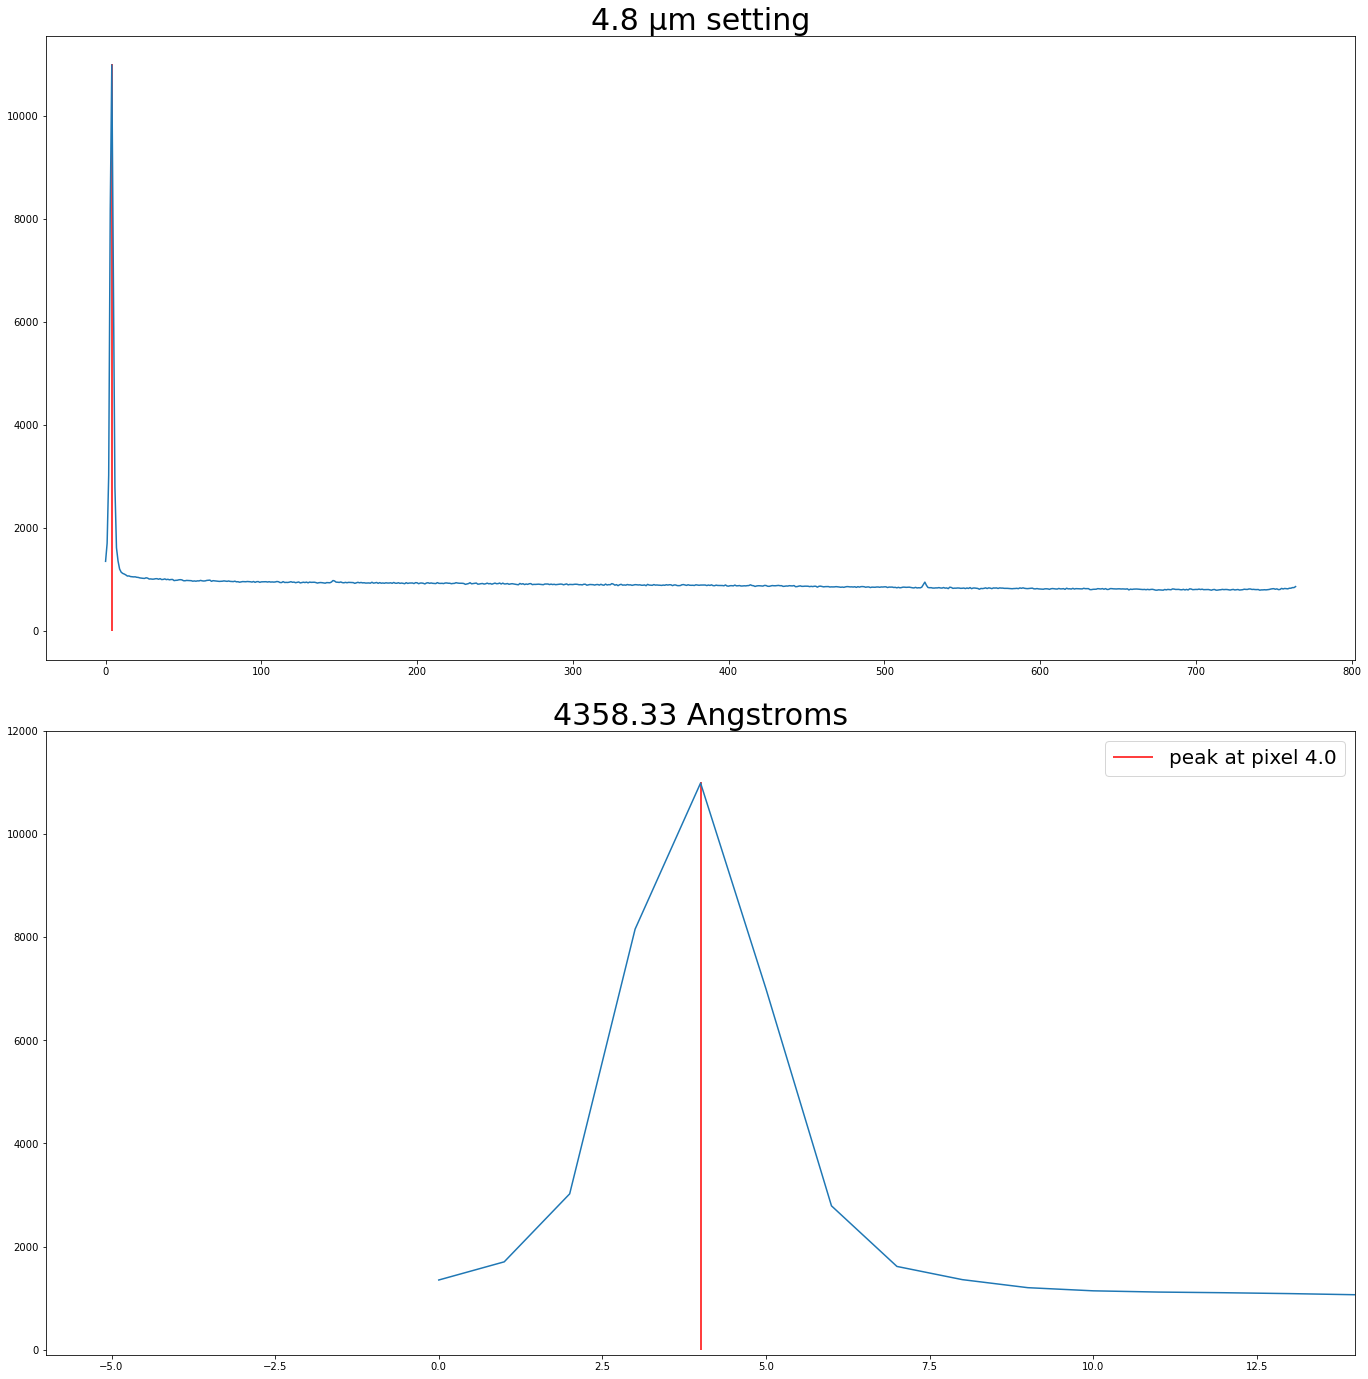

a is : 1.0720757268424614 , b is: 4354.04169709263
The spectrum runs from 4354.04169709263 angstroms to 5173.10755240027 angstroms


In [542]:
# Calibration for 4.8 µm
data = Hg_spectra[2]
p1 = 4.0

line1 = 4358.33

fig, (ax0, ax1) = plt.subplots(2,1, figsize = (20, 20))
fig.tight_layout(pad=5)
ax0.plot(data) ; ax0.set_title(f'{Micrometer[2]} µm setting', fontsize = 30)
ax0.vlines([p1], -10, 11000, colors = ['r'])

ax1.plot(data) ; ax1.set_title(f'{line1} Angstroms', fontsize=30)
ax1.vlines(p1, -10, 11000, label=f'peak at pixel {p1}', colors='r')
ax1.set_xlim(p1-10, p1+10)
ax1.set_ylim(-100, 12000)

ax1.legend(fontsize = 20)
plt.show()

a = 1.0720757268424614
b = line1 - a*p1
print (f'a is : {a} , b is: {b}')

pixelvalues = np.arange(len(data))
wavelengthvalues = a*pixelvalues+b
print(f'The spectrum runs from \033[1m{np.amin(wavelengthvalues)}\033[0m angstroms to \033[1m{np.amax(wavelengthvalues)}\033[0m angstroms') 

 Error on Fraunhofer Fe I is 0.007824695789283615 % or 0.3429999999998472 Å
 Error on Fraunhofer H is 0.02999171833622359 % or 1.4580000000005384 Å


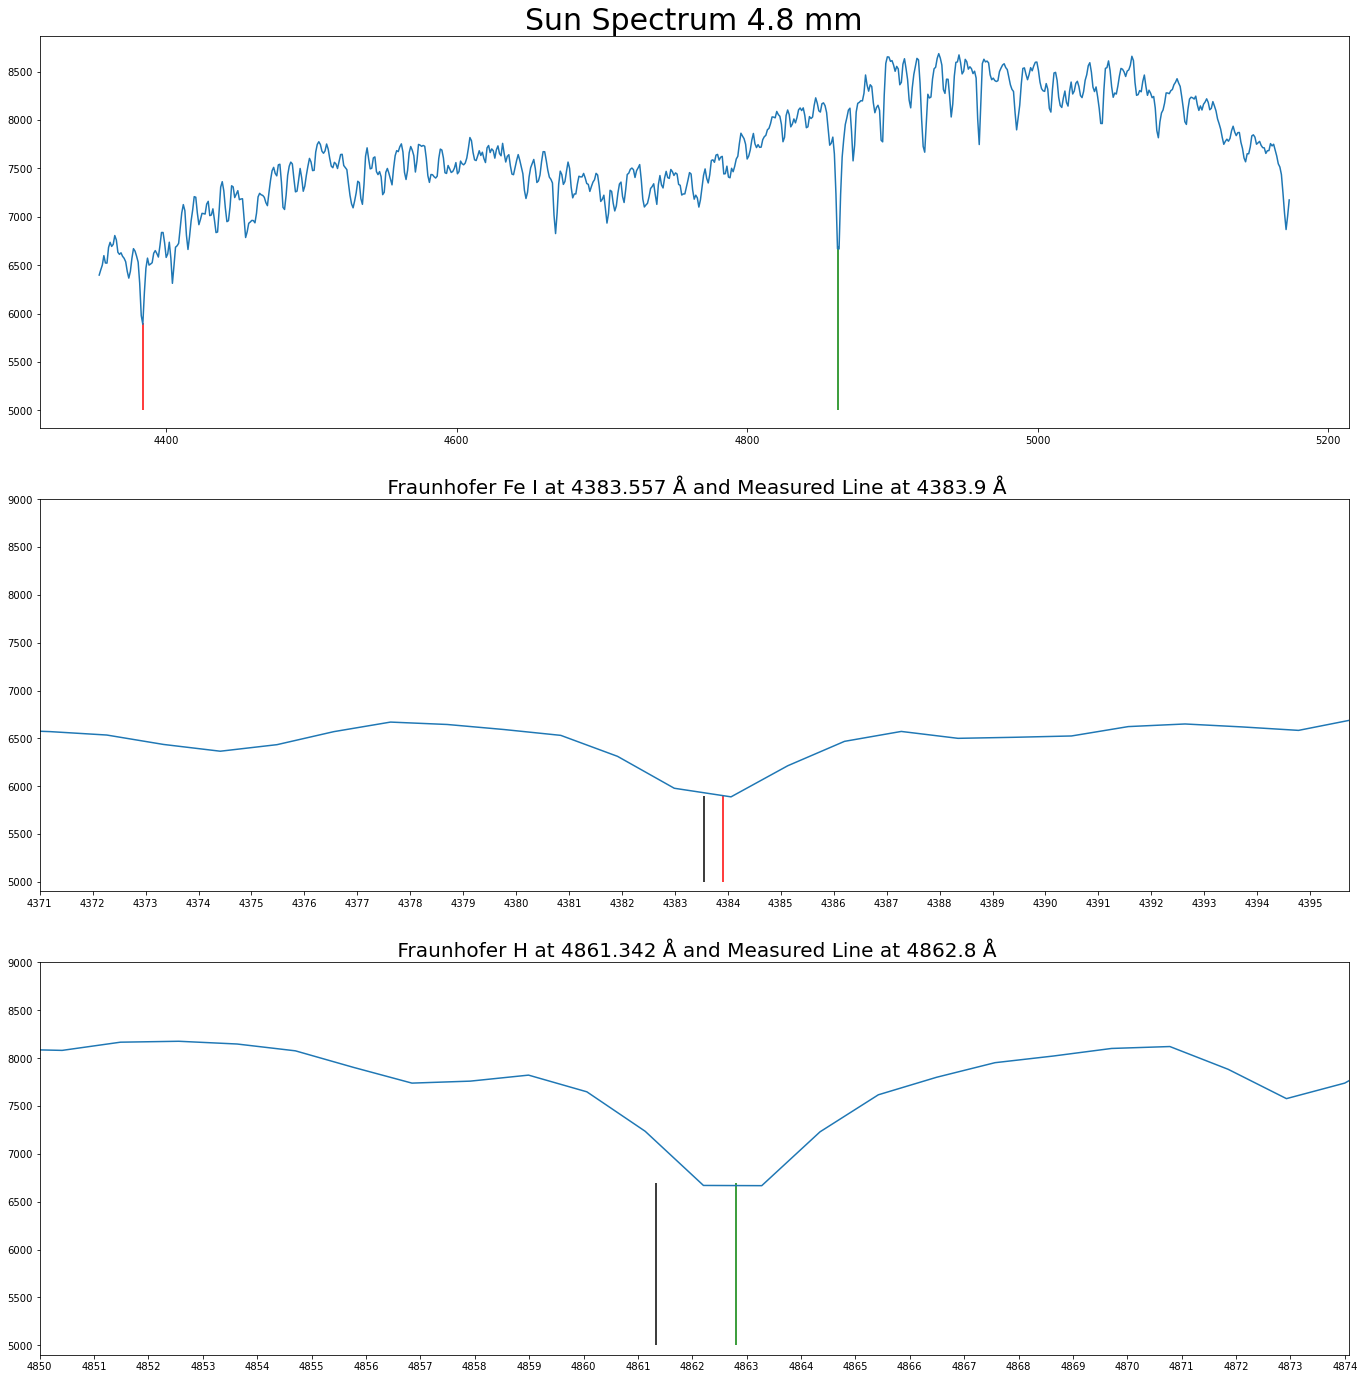

In [544]:
#Calibration for Sun
data = Sun_spectra[2]

obs_line1 = 4383.9
obs_line2 = 4862.8
spectral1 = 4383.557
spectral2 = 4861.342

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 20))
fig.tight_layout(pad=5)
ax0.set_title(f'Sun Spectrum {Micrometer[2]} mm', fontsize=30)
ax0.plot(wavelengthvalues,data)
ax0.vlines(obs_line1, 5000, 5900, colors=  'r')
ax0.vlines(obs_line2, 5000, 6700, colors = 'g')

ax1.plot(wavelengthvalues,data);
ax1.set_title(f' Fraunhofer Fe I at {spectral1} Å and Measured Line at {obs_line1} Å', fontsize=20)
ax1.vlines(obs_line1, 5000, 5900, colors='r')
ax1.vlines(spectral1, 5000, 5900, colors='black')
ax1.set_xlim((spectral1+obs_line1)/2 - 12, (spectral1+obs_line1)/2 +12)
ax1.set_xticks(np.arange(25)+int(((spectral1+obs_line1)/2 -12)))
ax1.set_ylim(4900, 9000)

ax2.plot(wavelengthvalues,data);
ax2.set_title(f' Fraunhofer H at {spectral2} Å and Measured Line at {obs_line2} Å', fontsize=20)
ax2.vlines(obs_line2, 5000, 6700, colors='g')
ax2.vlines(spectral2, 5000, 6700, colors='black')
ax2.set_xlim(((spectral2+obs_line2)/2 - 12),((spectral2+obs_line2)/2 +12))
ax2.set_xticks(np.arange(25)+int(((spectral2 + obs_line2)/2-12)))
ax2.set_ylim(4900, 9000)

error1 = np.abs(obs_line1-spectral1)
frac_error1 = error1/spectral1 * 100
error2 = np.abs(obs_line2-spectral2)
frac_error2 = error2/spectral2 * 100
print (f' Error on Fraunhofer Fe I is {frac_error1} % or {error1} Å')
print (f' Error on Fraunhofer H is {frac_error2} % or {error2} Å')

plt.show()

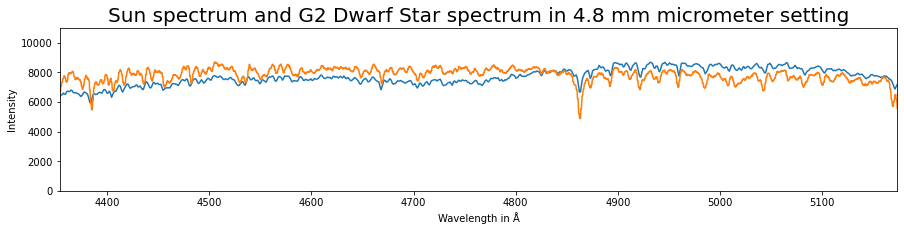

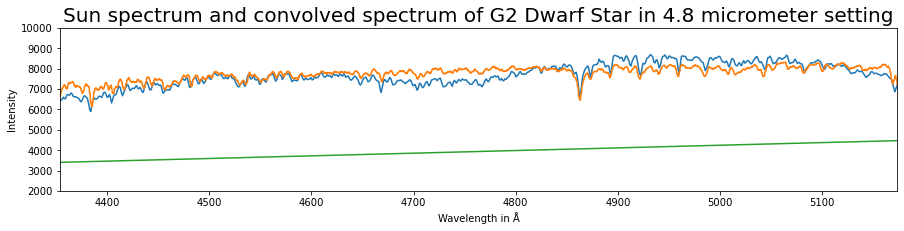

In [549]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/G2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,11000)
plt.title(f'Sun spectrum and G2 Dwarf Star spectrum in {Micrometer[2]} mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.30
offset = 3400
rescale = 0.49

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(2000, 10000)
plt.title(f'Sun spectrum and convolved spectrum of G2 Dwarf Star in {Micrometer[2]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

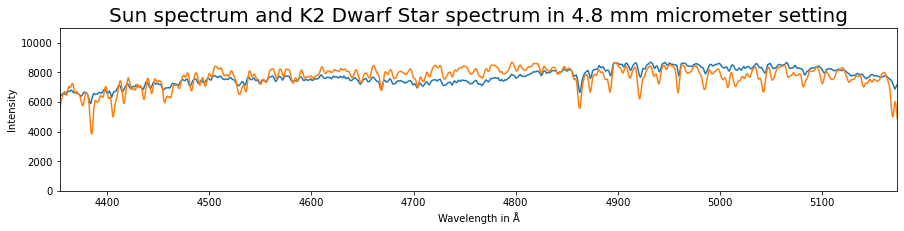

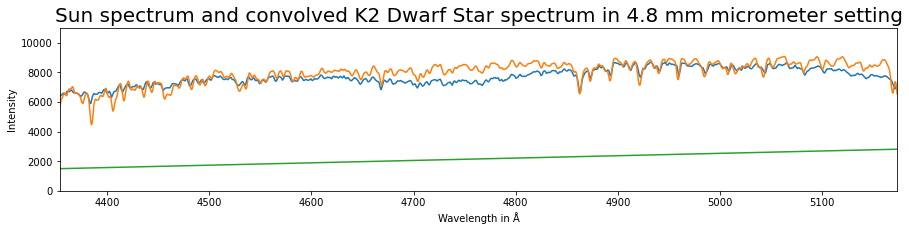

In [551]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/K2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,11000)
plt.title(f'Sun spectrum and K2 Dwarf Star spectrum in {Micrometer[2]} mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.6
offset = 1500
rescale = 0.76

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(0, 11000)
plt.title(f'Sun spectrum and convolved K2 Dwarf Star spectrum in {Micrometer[2]} mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

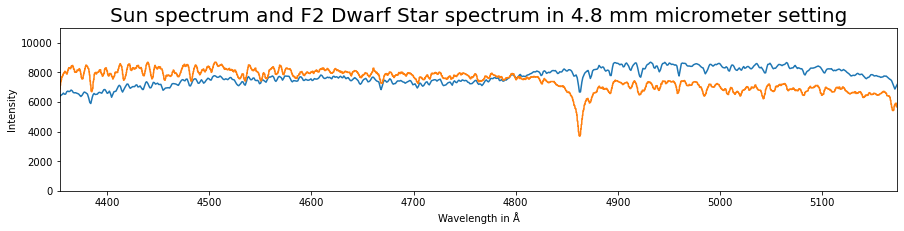

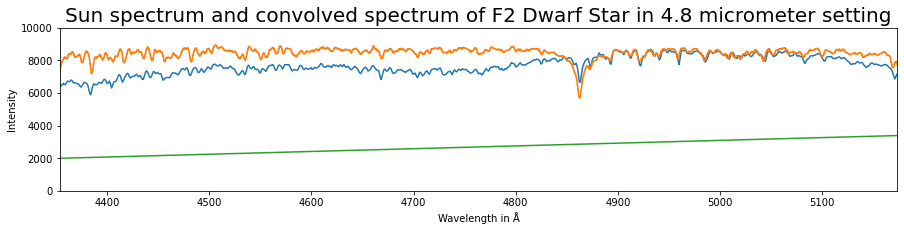

In [548]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/F2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,11000)
plt.title(f'Sun spectrum and F2 Dwarf Star spectrum in {Micrometer[2]} mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.7
offset = 2000
rescale = 0.77

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(0, 10000)
plt.title(f'Sun spectrum and convolved spectrum of F2 Dwarf Star in {Micrometer[2]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

## 5.2 mm Micrometer setting

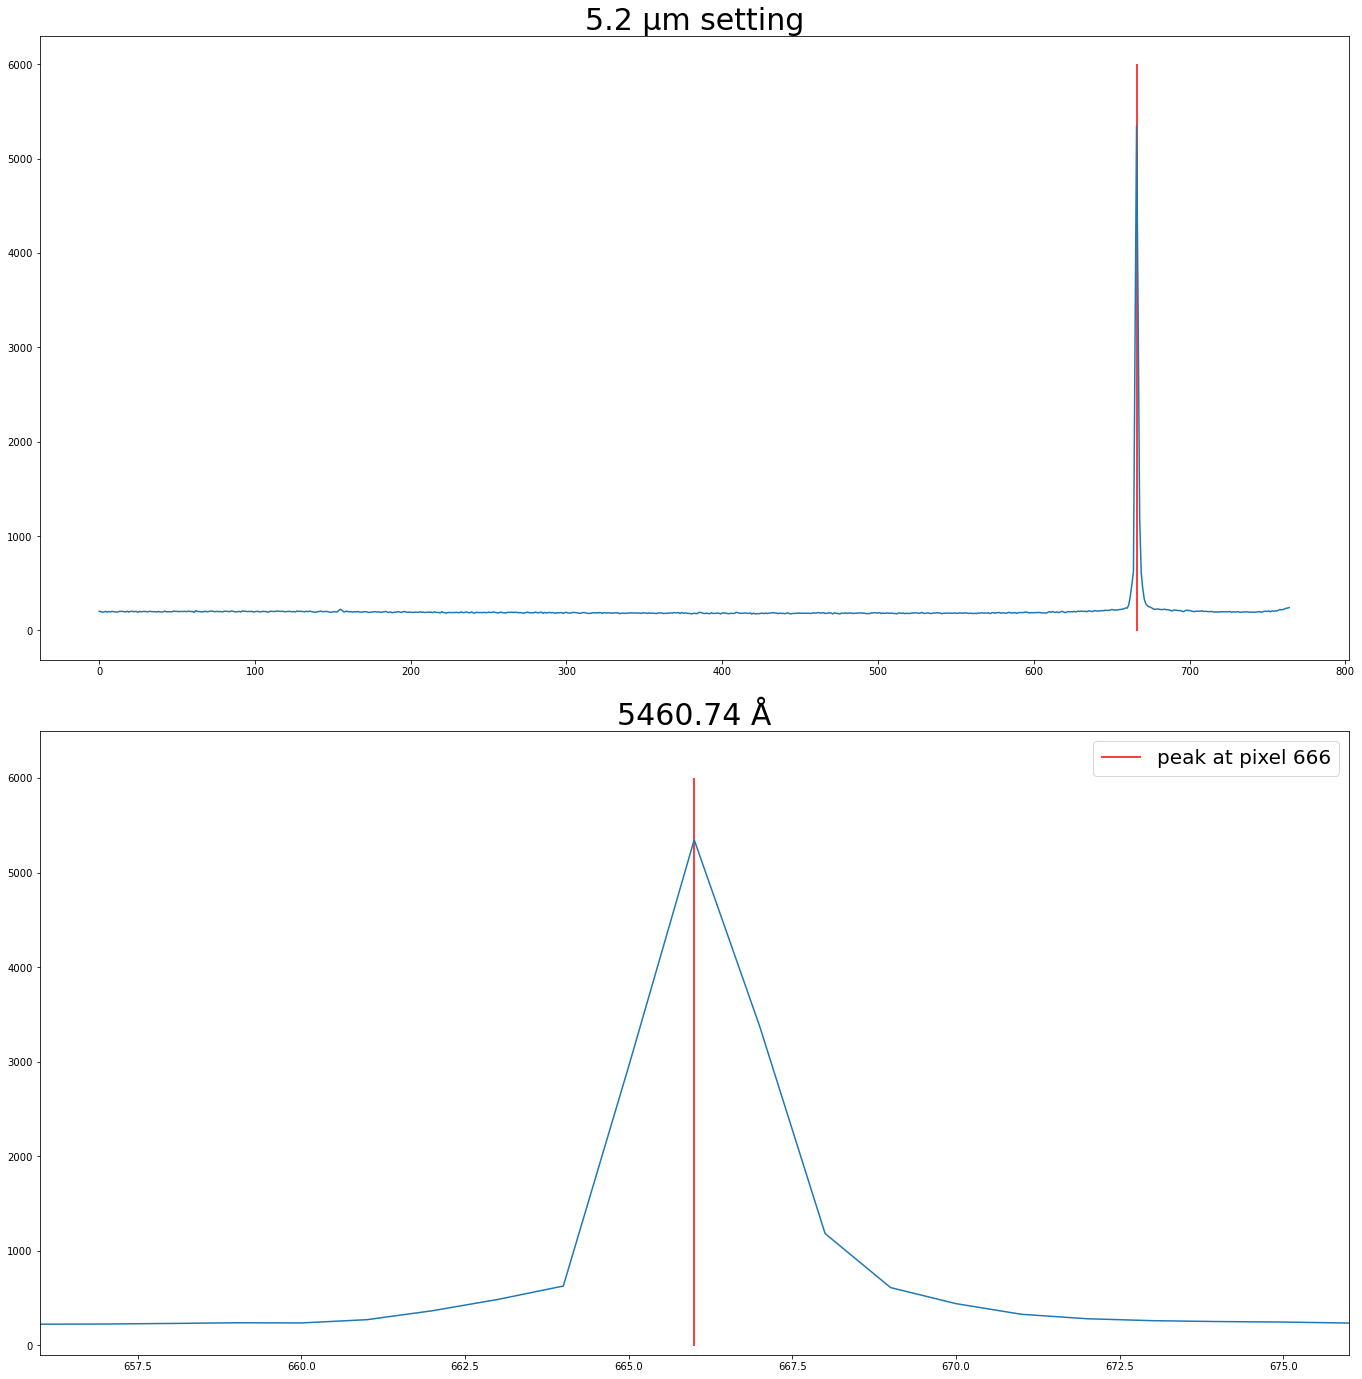

a is : 1.0720757268424614 , b is: 4746.73756592292
The spectrum runs from  4746.73756592292  Å to  5565.803421230561  Å


In [556]:
#Calibration for 5.2 µm
data = Hg_spectra[3]
p1 = 666

line1 = 5460.74

fig, (ax0, ax1) = plt.subplots(2,1, figsize = (20, 20))
fig.tight_layout(pad=5)
ax0.plot(data) ; ax0.set_title(f'{Micrometer[3]} µm setting', fontsize = 30)
ax0.vlines([p1], -10, 6000, colors = ['r'])

ax1.plot(data) ; ax1.set_title(f'{line1} Å', fontsize=30)
ax1.vlines(p1, -10, 6000, label=f'peak at pixel {p1}', colors='r')
ax1.set_xlim(p1-10, p1+10)
ax1.set_ylim(-100, 6500)

ax1.legend(fontsize = 20)
plt.show()

a = 1.0720757268424614
b = line1 - a*p1
print (f'a is : {a} , b is: {b}')

pixelvalues = np.arange(len(data))
wavelengthvalues = a*pixelvalues+b
print("The spectrum runs from ",np.amin(wavelengthvalues)," Å to ",np.amax(wavelengthvalues)," Å")

 Error on Fraunhofer H is 0.0728605393325436 % or 3.5419999999994616 Å
 Error on Fraunhofer Mg I is 0.040878776005715066 % or 2.118999999999687 Å


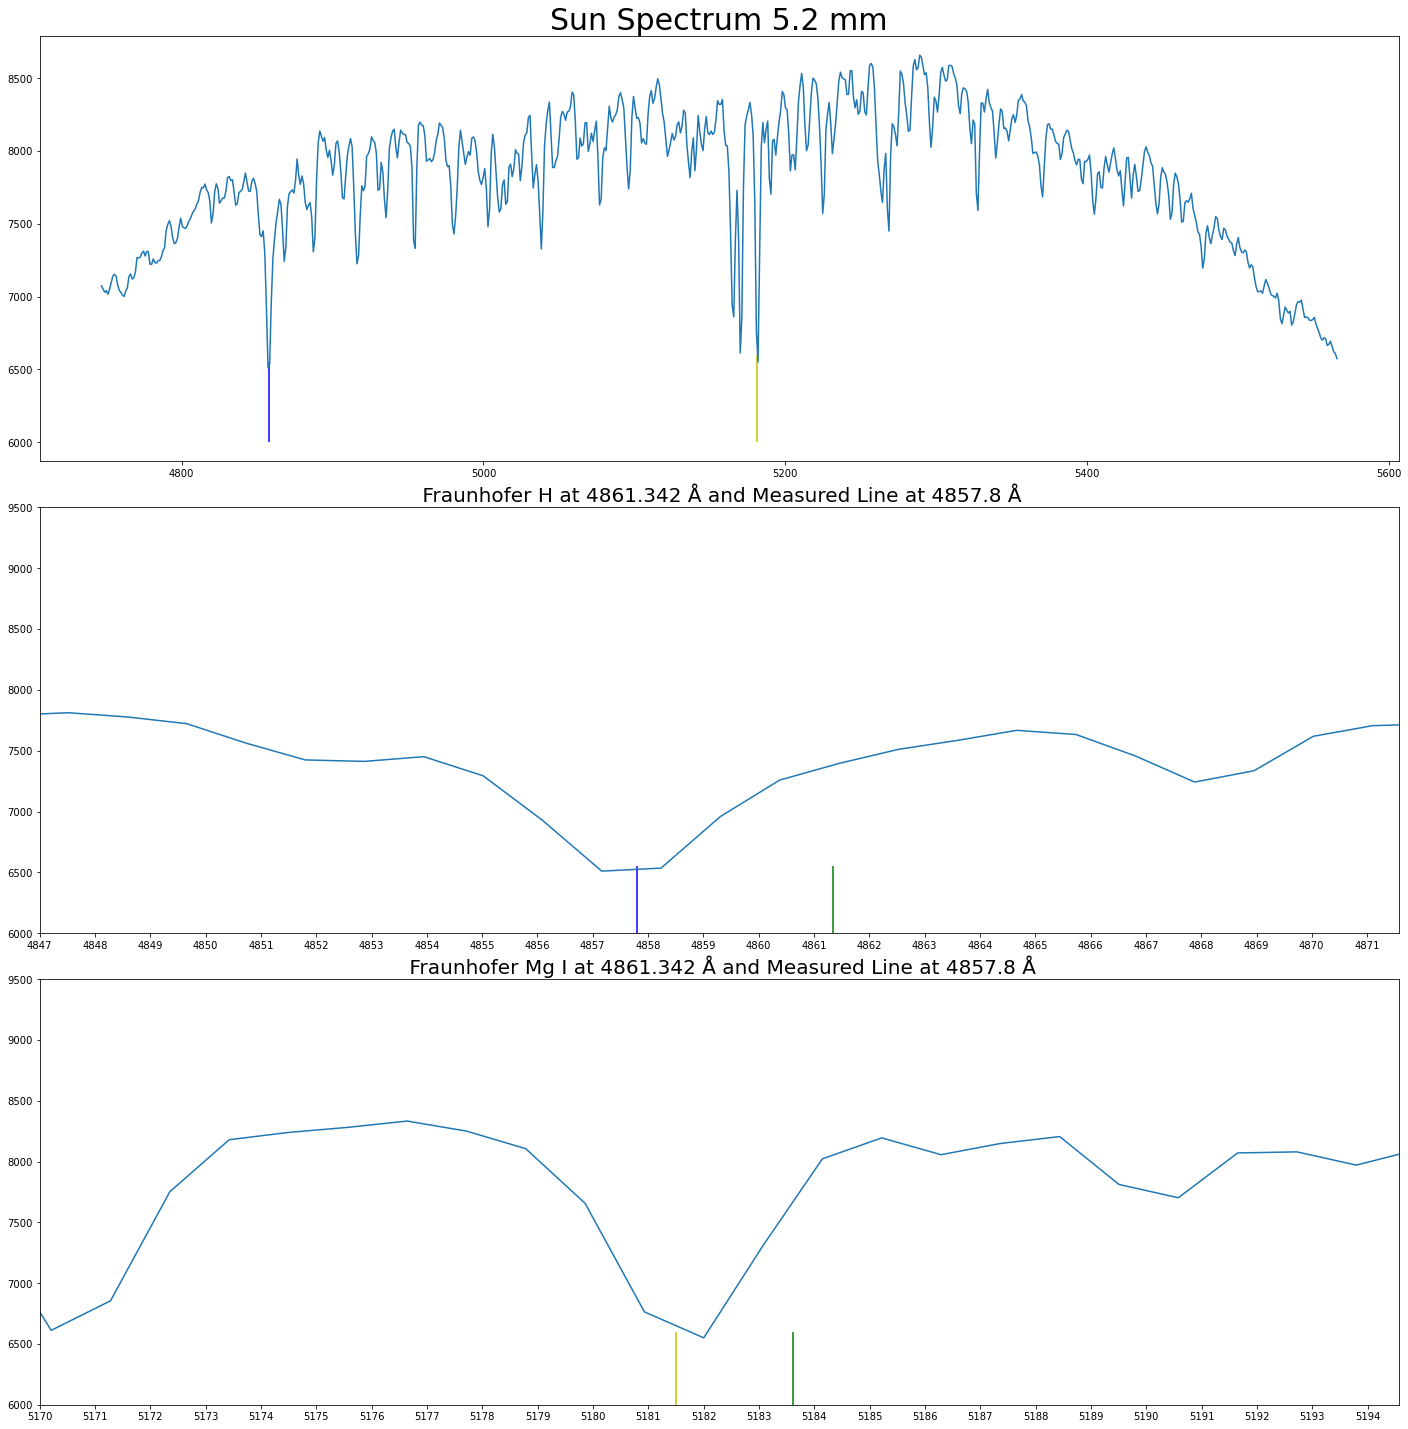

In [557]:
#Calibration for Sun spectra
data = Sun_spectra[3]

obs_line1 = 4857.8
obs_line2 = 5181.5
spectral1 = 4861.342
spectral2 = 5183.619

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 20))
fig.tight_layout(pad=2.5)
ax0.set_title(f'Sun Spectrum {Micrometer[3]} mm', fontsize=30)
ax0.plot(wavelengthvalues,data)
ax0.vlines(obs_line1, 6000, 6550, colors=  'b')
ax0.vlines(obs_line2, 6000, 6600, colors = 'y')

ax1.plot(wavelengthvalues,data);
ax1.set_title(f' Fraunhofer H at {spectral1} Å and Measured Line at {obs_line1} Å', fontsize=20)
ax1.vlines(obs_line1, 6000, 6550, colors='b')
ax1.vlines(spectral1, 6000, 6550, colors='g')
ax1.set_xlim((spectral1+obs_line1)/2 - 12, (spectral1+obs_line1)/2 +12)
ax1.set_xticks(np.arange(25)+int(((spectral1+obs_line1)/2 -12)))
ax1.set_ylim(6000, 9500)

ax2.plot(wavelengthvalues,data);
ax2.set_title(f' Fraunhofer Mg I at {spectral1} Å and Measured Line at {obs_line1} Å', fontsize=20)
ax2.vlines(obs_line2, 6000, 6600, colors='y')
ax2.vlines(spectral2, 6000, 6600, colors='g')
ax2.set_xlim(((spectral2+obs_line2)/2 - 12),((spectral2+obs_line2)/2 +12))
ax2.set_xticks(np.arange(25)+int(((spectral2 + obs_line2)/2-12)))
ax2.set_ylim(6000, 9500)

error1 = np.abs(obs_line1-spectral1)
frac_error1 = error1/spectral1 * 100
error2 = np.abs(obs_line2-spectral2)
frac_error2 = error2/spectral2 * 100
print (f' Error on Fraunhofer H is {frac_error1} % or {error1} Å')
print (f' Error on Fraunhofer Mg I is {frac_error2} % or {error2} Å')

plt.show()

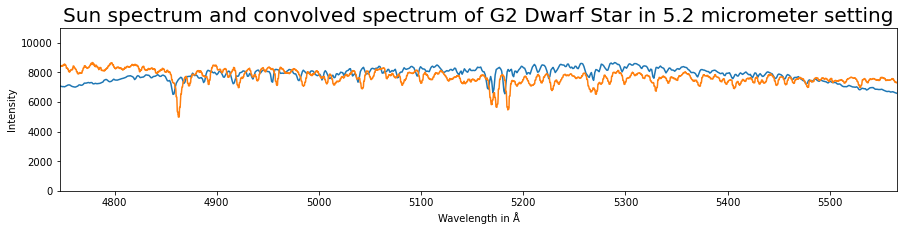

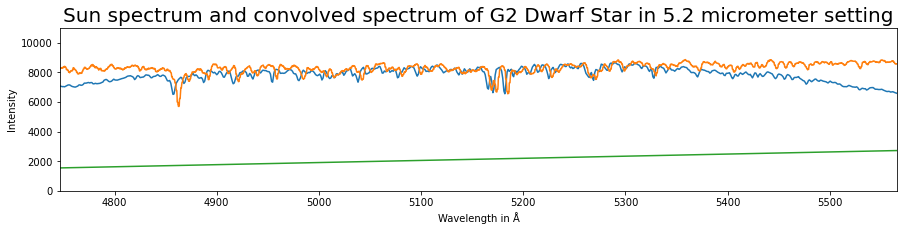

In [558]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/G2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,11000)
plt.title(f'Sun spectrum and convolved spectrum of G2 Dwarf Star in {Micrometer[3]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.43
offset = 1550
rescale = 0.8

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(0, 11000)
plt.title(f'Sun spectrum and convolved spectrum of G2 Dwarf Star in {Micrometer[3]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

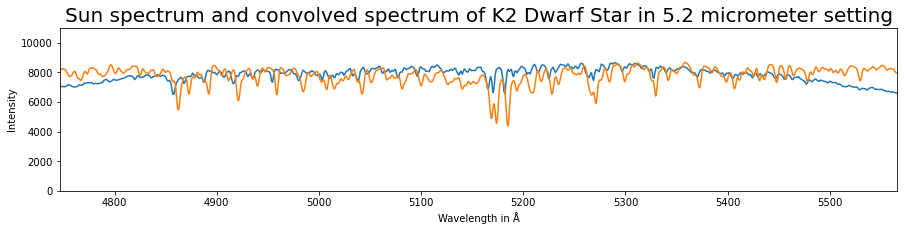

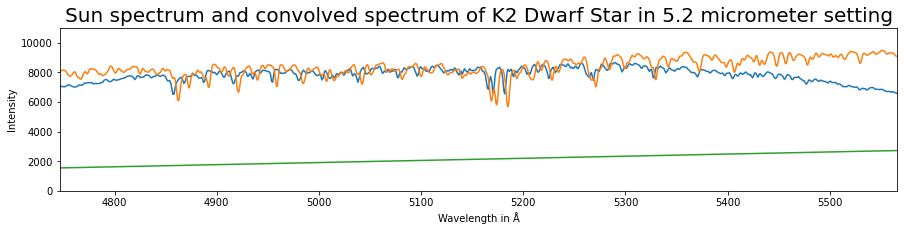

In [559]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/K2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,11000)
plt.title(f'Sun spectrum and convolved spectrum of K2 Dwarf Star in {Micrometer[3]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.43
offset = 1550
rescale = 0.8

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(0, 11000)
plt.title(f'Sun spectrum and convolved spectrum of K2 Dwarf Star in {Micrometer[3]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

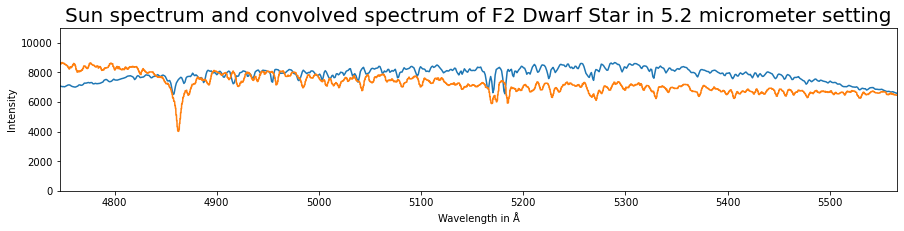

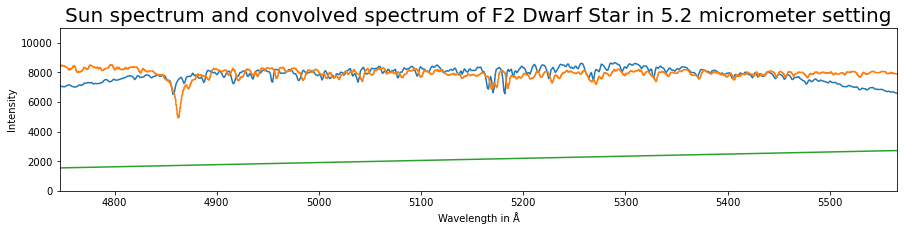

In [560]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/F2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,11000)
plt.title(f'Sun spectrum and convolved spectrum of F2 Dwarf Star in {Micrometer[3]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.43
offset = 1550
rescale = 0.8

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(0, 11000)
plt.title(f'Sun spectrum and convolved spectrum of F2 Dwarf Star in {Micrometer[3]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

## 5.6 mm Micrometer setting

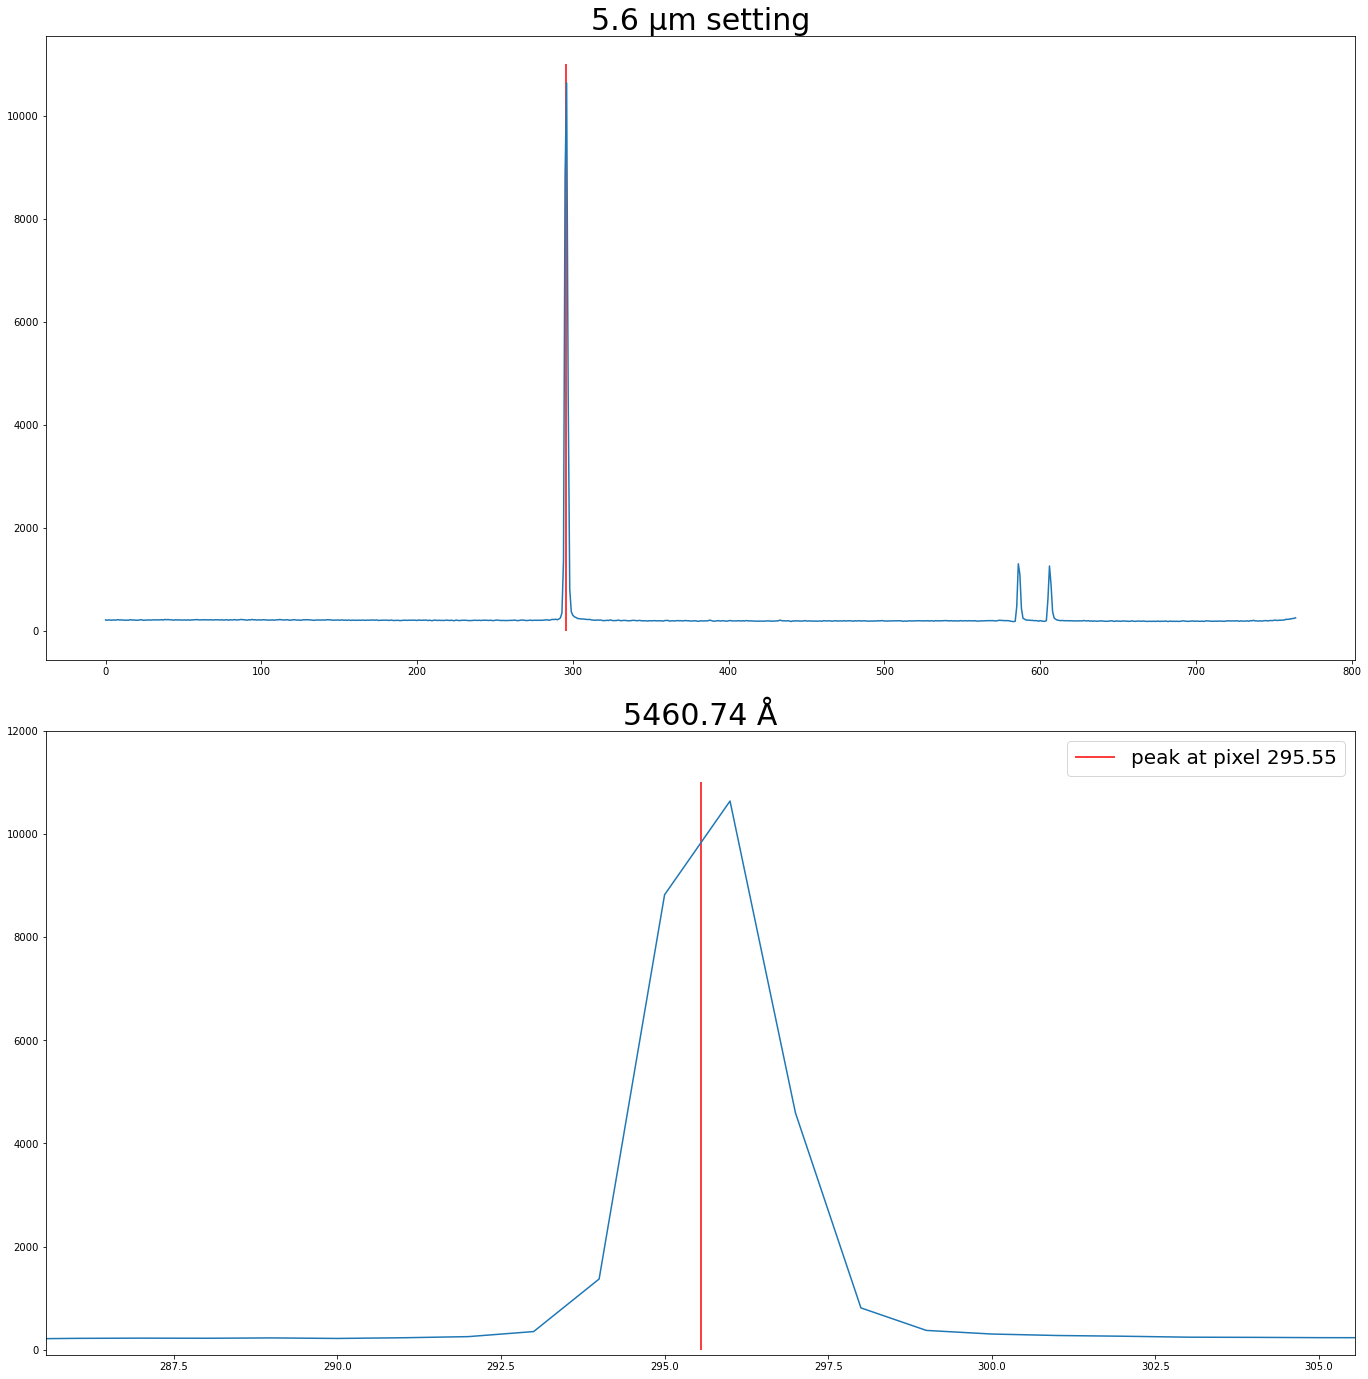

a is : 1.0720757268424614 , b is: 5143.888018931711
The spectrum runs from  5143.888018931711  Å to  5962.953874239351  Å


In [624]:
#Calibration for 5.6 µm
data = Hg_spectra[4]
p1 = 295.55

line1 = 5460.74

fig, (ax0, ax1) = plt.subplots(2,1, figsize = (20, 20))
fig.tight_layout(pad=5)
ax0.plot(data) ;  ax0.set_title(f'{Micrometer[4]} µm setting', fontsize = 30)
ax0.vlines([p1], -10, 11000, colors = ['r'])

ax1.plot(data) ; ax1.set_title(f'{line1} Å', fontsize=30)
ax1.vlines(p1, -10, 11000, label=f'peak at pixel {p1}', colors='r')
ax1.set_xlim(p1-10, p1+10)
ax1.set_ylim(-100, 12000)

ax1.legend(fontsize = 20)
plt.show()

a = 1.0720757268424614
b = line1 - a*p1
print (f'a is : {a} , b is: {b}')

pixelvalues = np.arange(len(data))
wavelengthvalues = a*pixelvalues+b
print("The spectrum runs from ",np.amin(wavelengthvalues)," Å to ",np.amax(wavelengthvalues)," Å")

 Error on Fraunhofer Fe I at 5269.55 Å is 0.01992580011576286 % or 1.050000000000182 Å
 Error on Fraunhofer Fe I at 5328.051 Å is 0.014095210424979108 % or 0.7510000000002037 Å


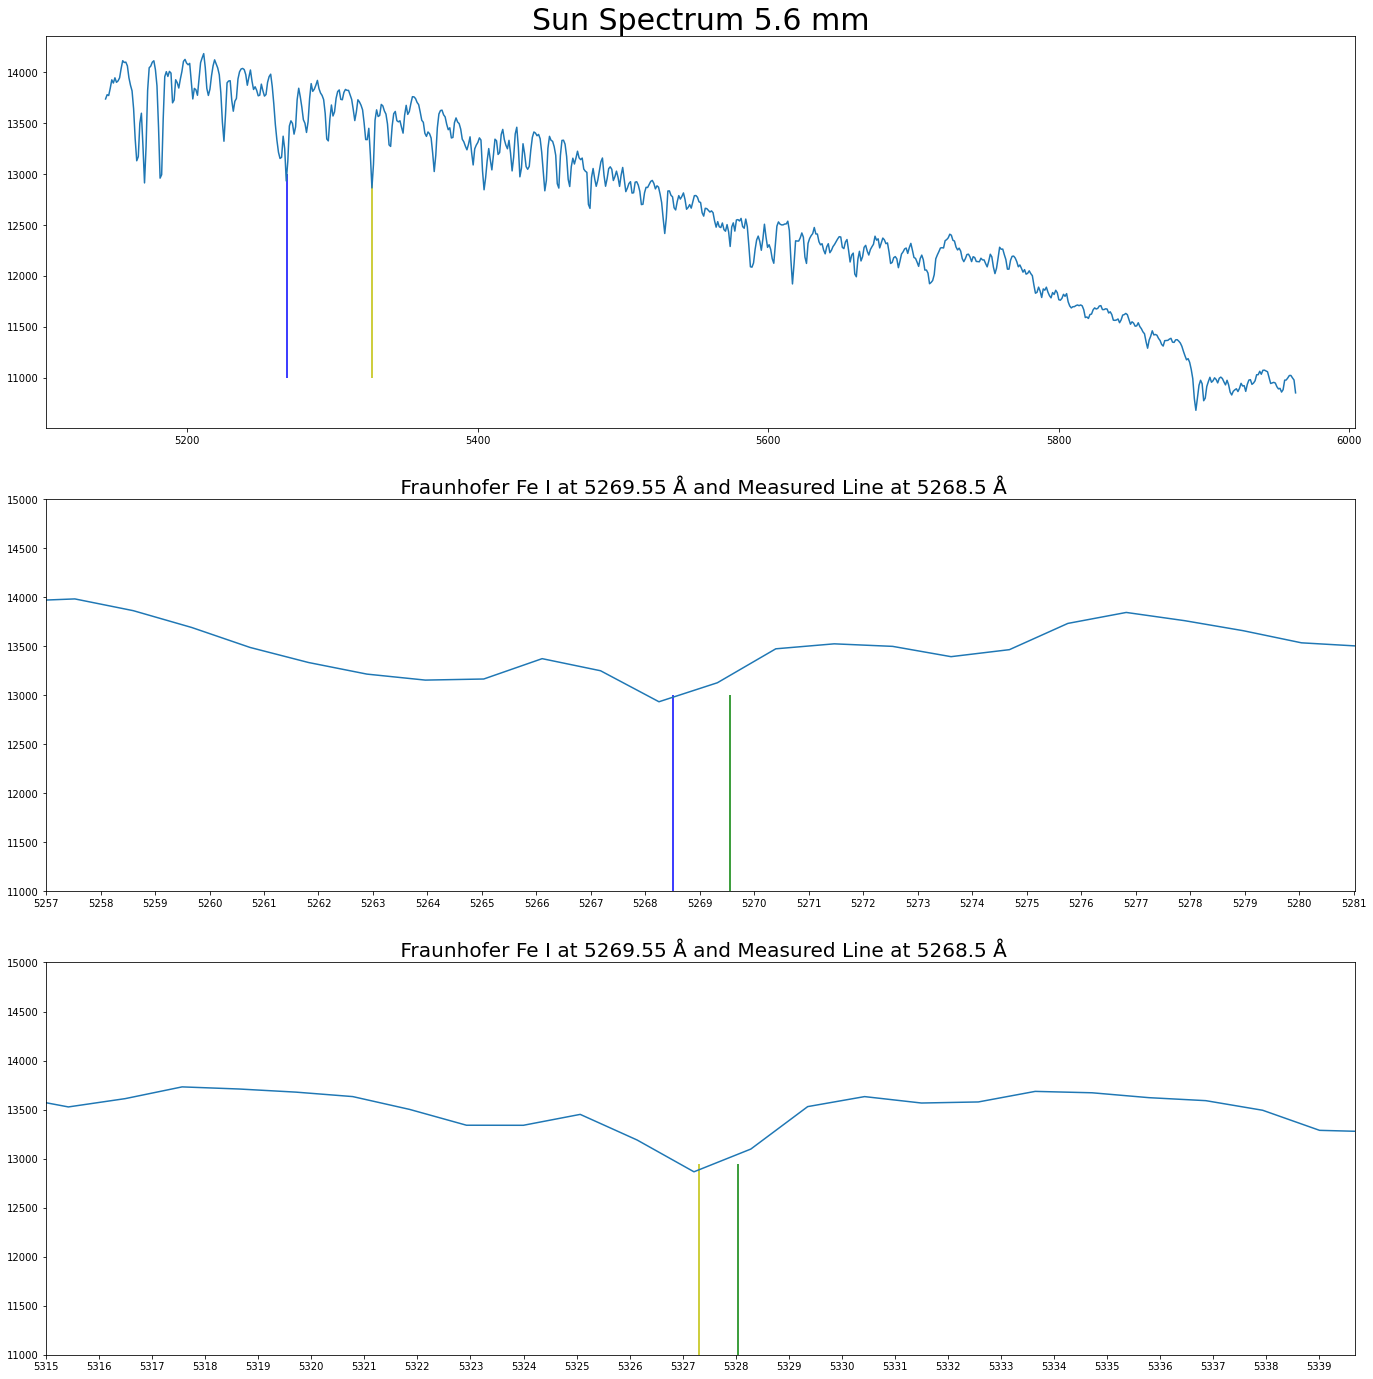

In [625]:
#Calibration for Sun Spectra 
data = Sun_spectra[4]

obs_line1 = 5268.5
obs_line2 = 5327.3
spectral1 = 5269.550
spectral2 = 5328.051

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 20))
fig.tight_layout(pad=5)
ax0.set_title(f'Sun Spectrum {Micrometer[4]} mm', fontsize=30)
ax0.plot(wavelengthvalues,data)
ax0.vlines(obs_line1, 11000, 13000, colors=  'b')
ax0.vlines(obs_line2, 11000, 12950, colors = 'y')

ax1.plot(wavelengthvalues,data);
ax1.set_title(f' Fraunhofer Fe I at {spectral1} Å and Measured Line at {obs_line1} Å', fontsize=20)
ax1.vlines(obs_line1, 11000, 13000, colors='b')
ax1.vlines(spectral1, 11000, 13000, colors='g')
ax1.set_xlim((spectral1+obs_line1)/2 - 12, (spectral1+obs_line1)/2 +12)
ax1.set_xticks(np.arange(25)+int(((spectral1+obs_line1)/2 -12)))
ax1.set_ylim(11000, 15000)

ax2.plot(wavelengthvalues,data);
ax2.set_title(f' Fraunhofer Fe I at {spectral1} Å and Measured Line at {obs_line1} Å', fontsize=20)
ax2.vlines(obs_line2, 11000, 12950, colors='y')
ax2.vlines(spectral2, 11000, 12950, colors='g')
ax2.set_xlim(((spectral2+obs_line2)/2 - 12),((spectral2+obs_line2)/2 +12))
ax2.set_xticks(np.arange(25)+int(((spectral2 + obs_line2)/2-12)))
ax2.set_ylim(11000, 15000)

error1 = np.abs(obs_line1-spectral1)
frac_error1 = error1/spectral1 * 100
error2 = np.abs(obs_line2-spectral2)
frac_error2 = error2/spectral2 * 100
print (f' Error on Fraunhofer Fe I at {spectral1} Å is {frac_error1} % or {error1} Å')
print (f' Error on Fraunhofer Fe I at {spectral2} Å is {frac_error2} % or {error2} Å')

plt.show()

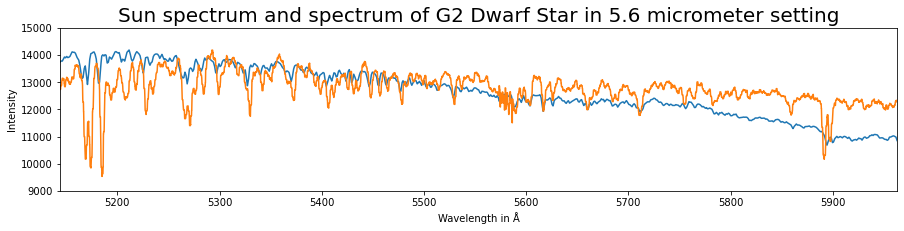

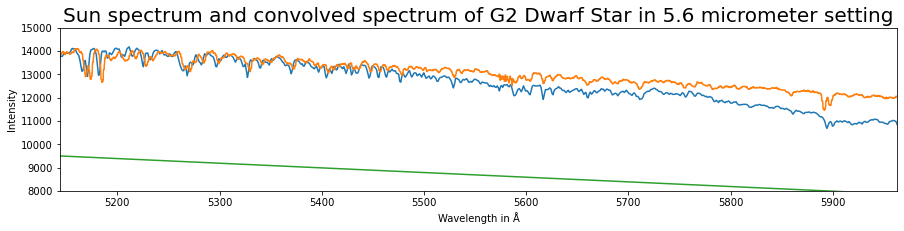

In [626]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/G2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(9000,15000)
plt.title(f'Sun spectrum and spectrum of G2 Dwarf Star in {Micrometer[4]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = -2
offset = 9500
rescale = 0.34

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(8000, 15000)
plt.title(f'Sun spectrum and convolved spectrum of G2 Dwarf Star in {Micrometer[4]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

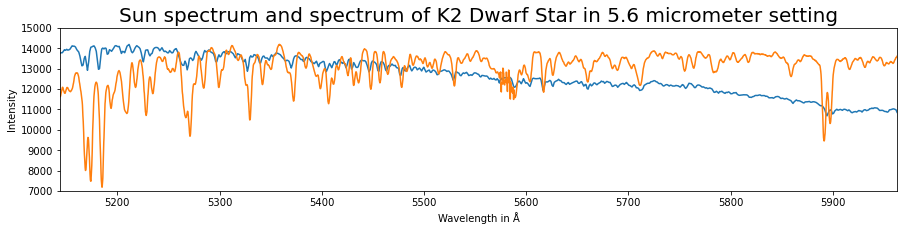

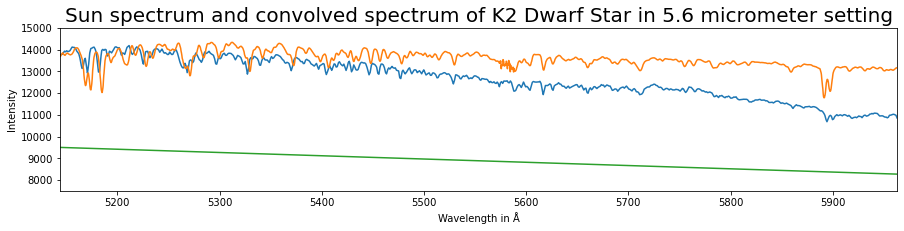

In [627]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/K2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(7000,15000)
plt.title(f'Sun spectrum and spectrum of K2 Dwarf Star in {Micrometer[4]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = -1.5
offset = 9500
rescale = 0.36

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(7500, 15000)
plt.title(f'Sun spectrum and convolved spectrum of K2 Dwarf Star in {Micrometer[4]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

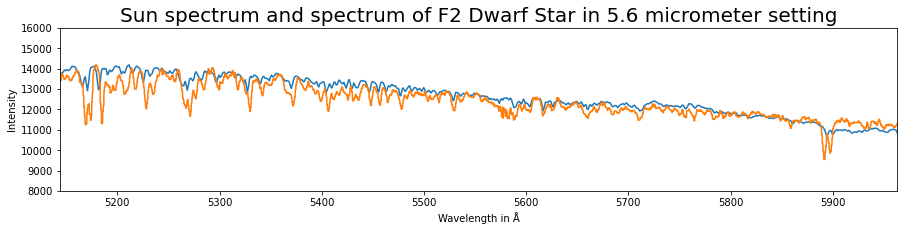

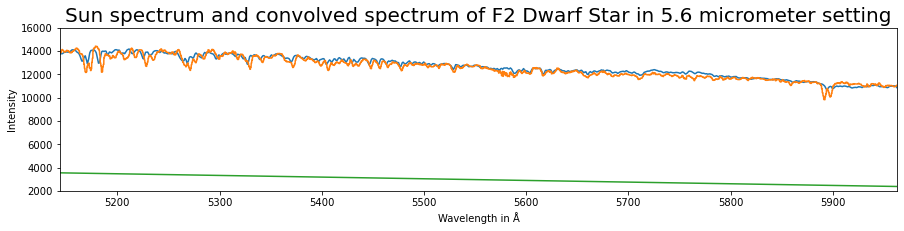

In [628]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/F2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(8000,16000)
plt.title(f'Sun spectrum and spectrum of F2 Dwarf Star in {Micrometer[4]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = -1.43
offset = 3550
rescale = 0.77

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(2000, 16000)
plt.title(f'Sun spectrum and convolved spectrum of F2 Dwarf Star in {Micrometer[4]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

## 6.0 mm Micrometer setting 

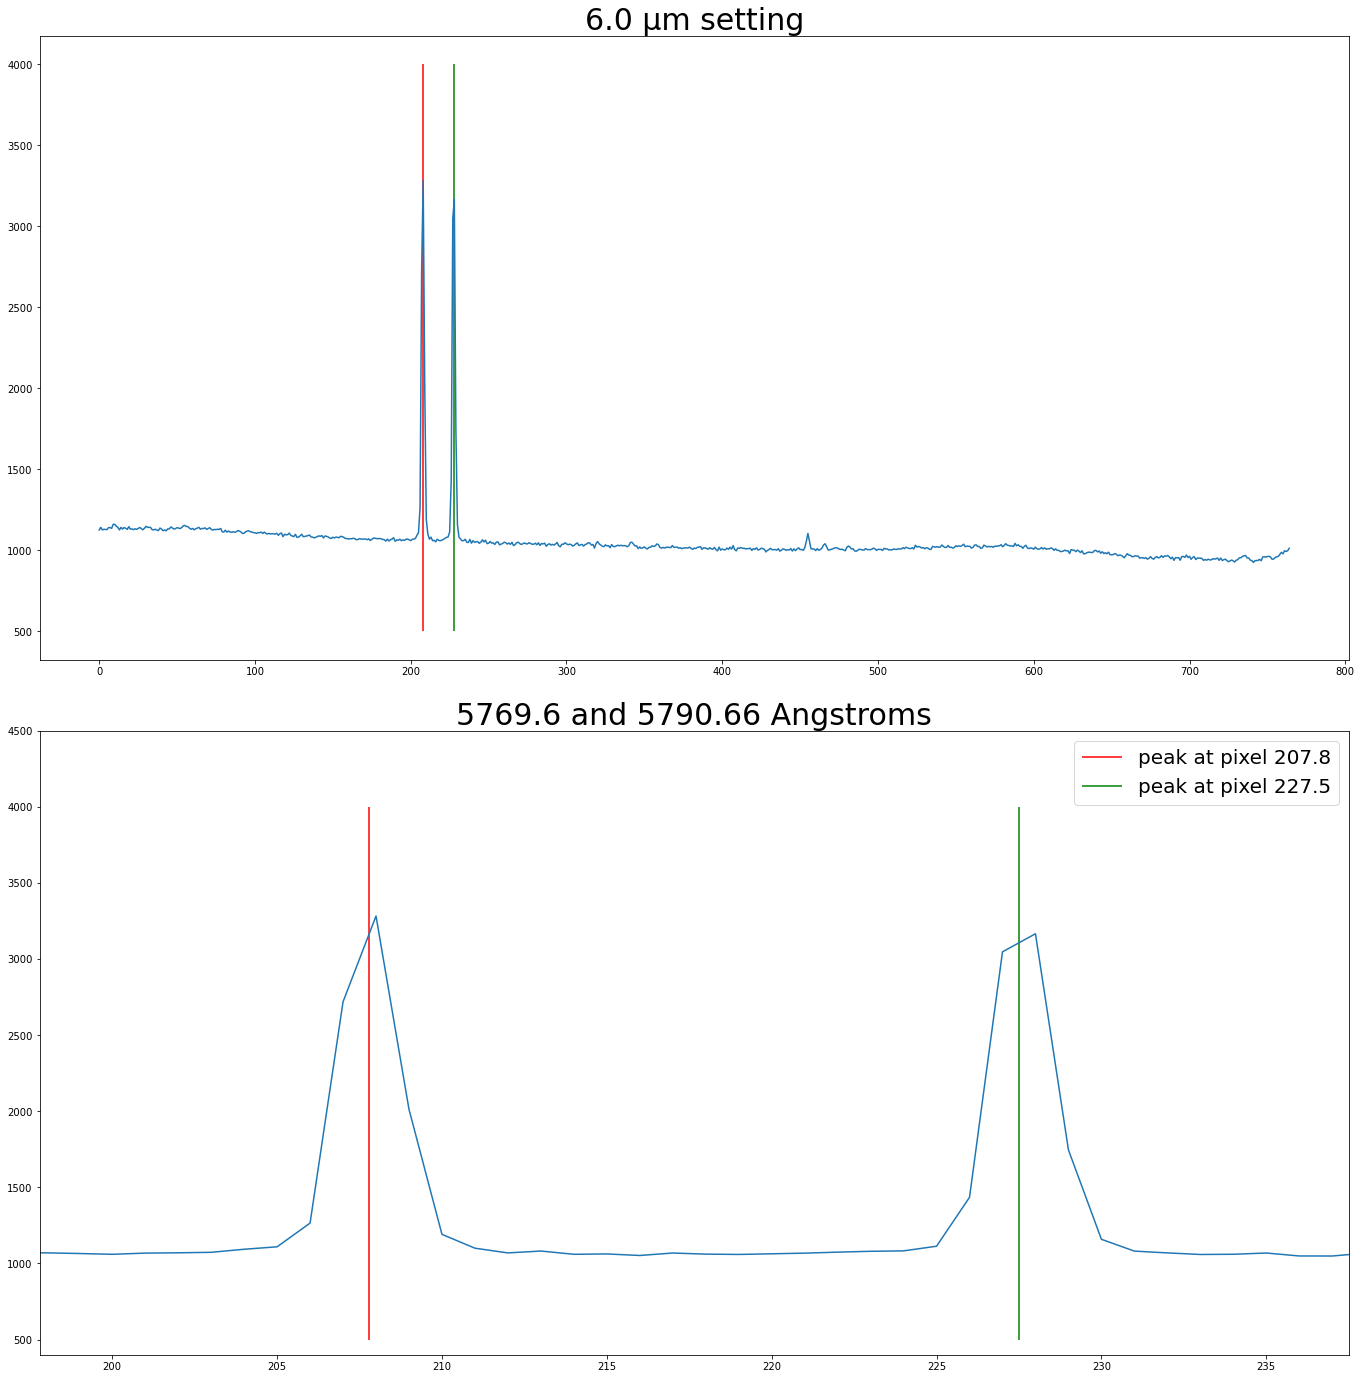

a is : 1.0690355329948986 , b is: 5547.4544162436605
The spectrum runs from  5547.4544162436605  angstroms to  6364.197563451763  angstroms


In [613]:
#Calibration for 6.0 µm
data = Hg_spectra[5]
p1 = 207.8
p2 = 227.5

line1 = 5769.60
line2 = 5790.66

fig, (ax0, ax1) = plt.subplots(2,1, figsize = (20, 20))
fig.tight_layout(pad=5)
ax0.plot(data) ; ax0.set_title(f'{Micrometer[5]} µm setting', fontsize = 30)
ax0.vlines([p1, p2], 500, 4000, colors = ['r', 'g'])

ax1.plot(data) ; ax1.set_title(f'{line1} and {line2} Angstroms', fontsize=30)
ax1.vlines(p1, 500, 4000, label =f'peak at pixel {p1}', color='r')
ax1.vlines(p2,500,4000,label=f'peak at pixel {p2}', color ='g')
ax1.set_xlim(p1-10, p2+10)
ax1.set_ylim(400, 4500)

ax1.legend(fontsize = 20)
plt.show()

a = (line1 - line2)/(p1-p2)
b = line1 - a*p1
print (f'a is : {a} , b is: {b}')

pixelvalues = np.arange(len(data))
wavelengthvalues = a*pixelvalues+b
print("The spectrum runs from ",np.amin(wavelengthvalues)," angstroms to ",np.amax(wavelengthvalues)," angstroms")

 Error on Fraunhofer Na I (D2) is 0.00045840617605621715 % or 0.027000000000043656 Å
 Error on Fraunhofer Na I (D1) is 0.007801978988931984 % or 0.4600000000000364 Å


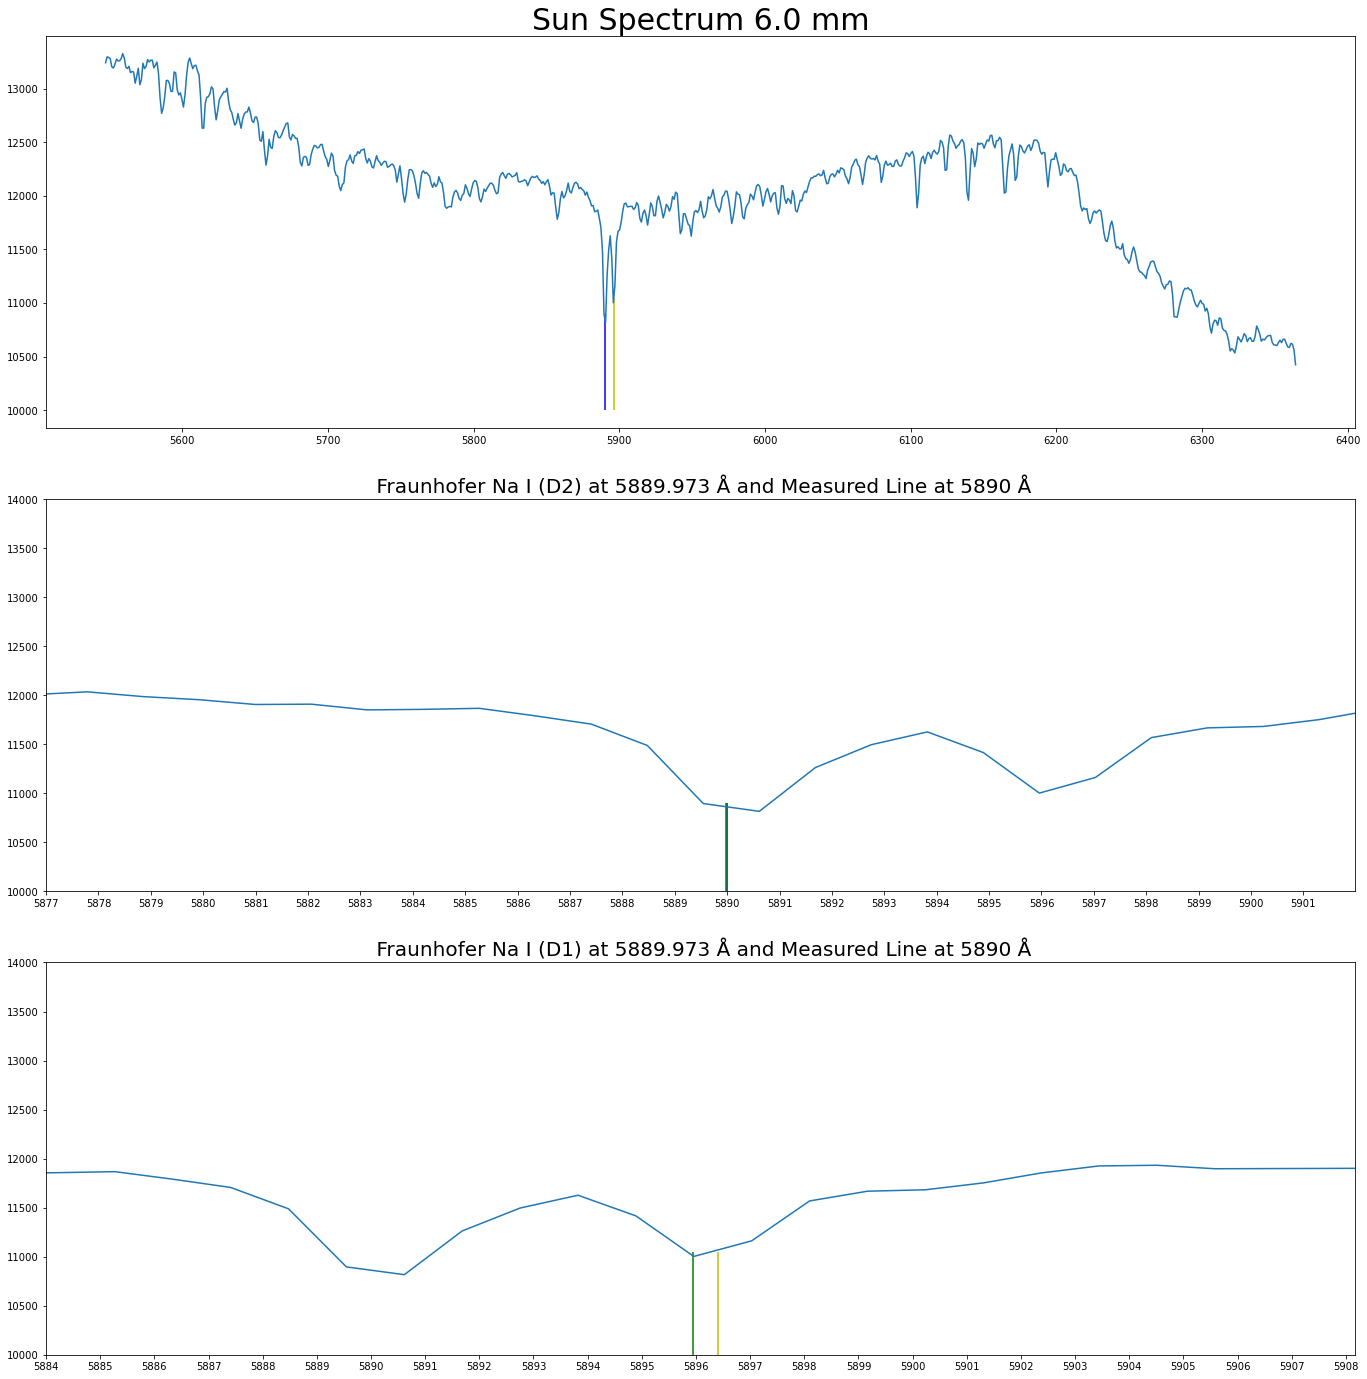

In [614]:
#Calibration of Sun Spectra 
data = Sun_spectra[5]

obs_line1 = 5890
obs_line2 = 5896.4
spectral1 = 5889.973
spectral2 = 5895.940

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 20))
fig.tight_layout(pad=5)
ax0.set_title(f'Sun Spectrum {Micrometer[5]} mm', fontsize=30)
ax0.plot(wavelengthvalues,data)
ax0.vlines(obs_line1, 10000, 10900, colors=  'b')
ax0.vlines(obs_line2, 10000, 11050, colors = 'y')

ax1.plot(wavelengthvalues,data);
ax1.set_title(f' Fraunhofer Na I (D2) at {spectral1} Å and Measured Line at {obs_line1} Å', fontsize=20)
ax1.vlines(obs_line1, 10000, 10900, colors='b')
ax1.vlines(spectral1, 10000, 10900, colors='g')
ax1.set_xlim((spectral1+obs_line1)/2 - 12, (spectral1+obs_line1)/2 +12)
ax1.set_xticks(np.arange(25)+int(((spectral1+obs_line1)/2 -12)))
ax1.set_ylim(10000, 14000)

ax2.plot(wavelengthvalues,data);
ax2.set_title(f' Fraunhofer Na I (D1) at {spectral1} Å and Measured Line at {obs_line1} Å', fontsize=20)
ax2.vlines(obs_line2, 10000, 11050, colors='y')
ax2.vlines(spectral2, 10000, 11050, colors='g')
ax2.set_xlim(((spectral2+obs_line2)/2 - 12),((spectral2+obs_line2)/2 +12))
ax2.set_xticks(np.arange(25)+int(((spectral2 + obs_line2)/2-12)))
ax2.set_ylim(10000, 14000)

error1 = np.abs(obs_line1-spectral1)
frac_error1 = error1/spectral1 * 100
error2 = np.abs(obs_line2-spectral2)
frac_error2 = error2/spectral2 * 100
print (f' Error on Fraunhofer Na I (D2) is {frac_error1} % or {error1} Å')
print (f' Error on Fraunhofer Na I (D1) is {frac_error2} % or {error2} Å')

plt.show()

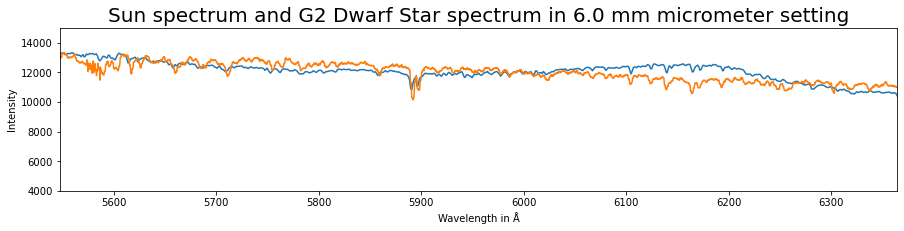

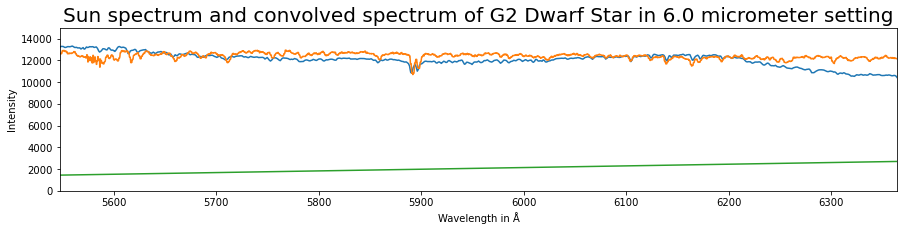

In [617]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/G2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(4000, 15000)
plt.title(f'Sun spectrum and G2 Dwarf Star spectrum in {Micrometer[5]} mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.54
offset = 1450
rescale = 0.86

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(0, 15000)
plt.title(f'Sun spectrum and convolved spectrum of G2 Dwarf Star in {Micrometer[5]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

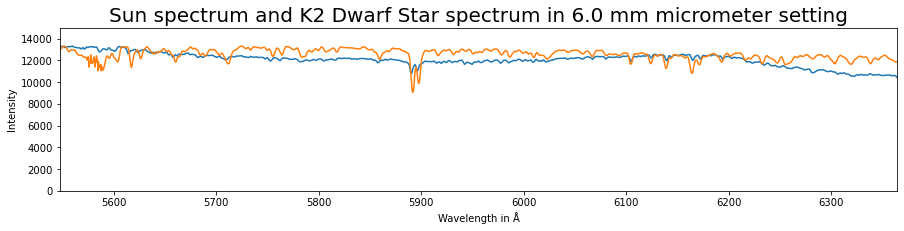

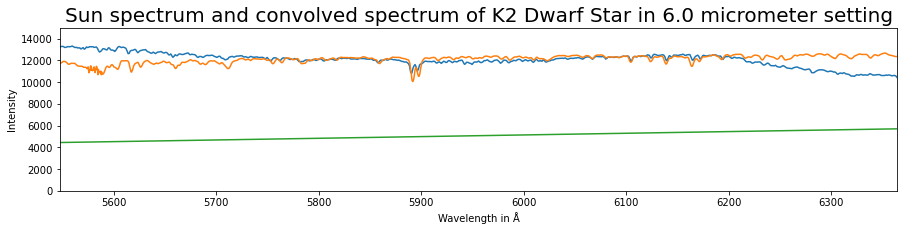

In [623]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/K2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,15000)
plt.title(f'Sun spectrum and K2 Dwarf Star spectrum in {Micrometer[5]} mm micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.54
offset = 4450
rescale = 0.56

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(0, 15000)
plt.title(f'Sun spectrum and convolved spectrum of K2 Dwarf Star in {Micrometer[5]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

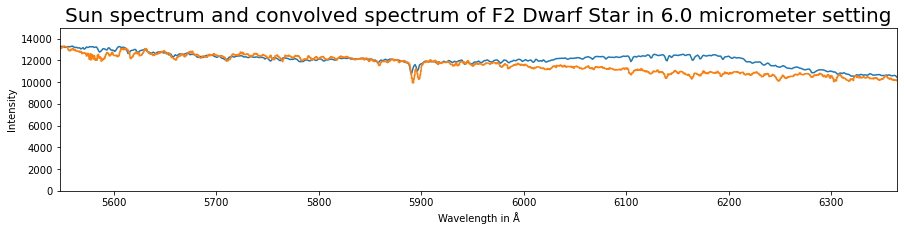

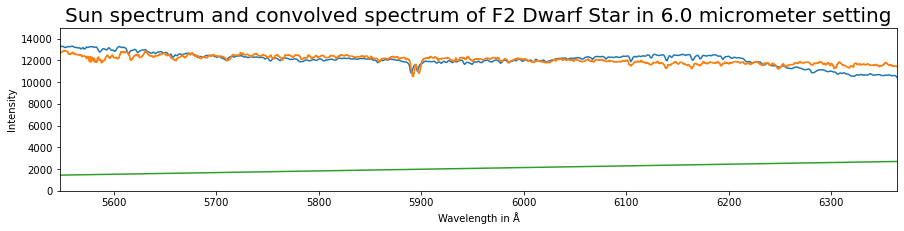

In [612]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/F2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,15000)
plt.title(f'Sun spectrum and convolved spectrum of F2 Dwarf Star in {Micrometer[5]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.54
offset = 1450
rescale = 0.86

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.ylim(0, 15000)
plt.title(f'Sun spectrum and convolved spectrum of F2 Dwarf Star in {Micrometer[5]} micrometer setting', fontsize = 20)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.xlabel('Wavelength in Å')
plt.ylabel('Intensity')
plt.show()

## 6.4 mm Micrometer setting

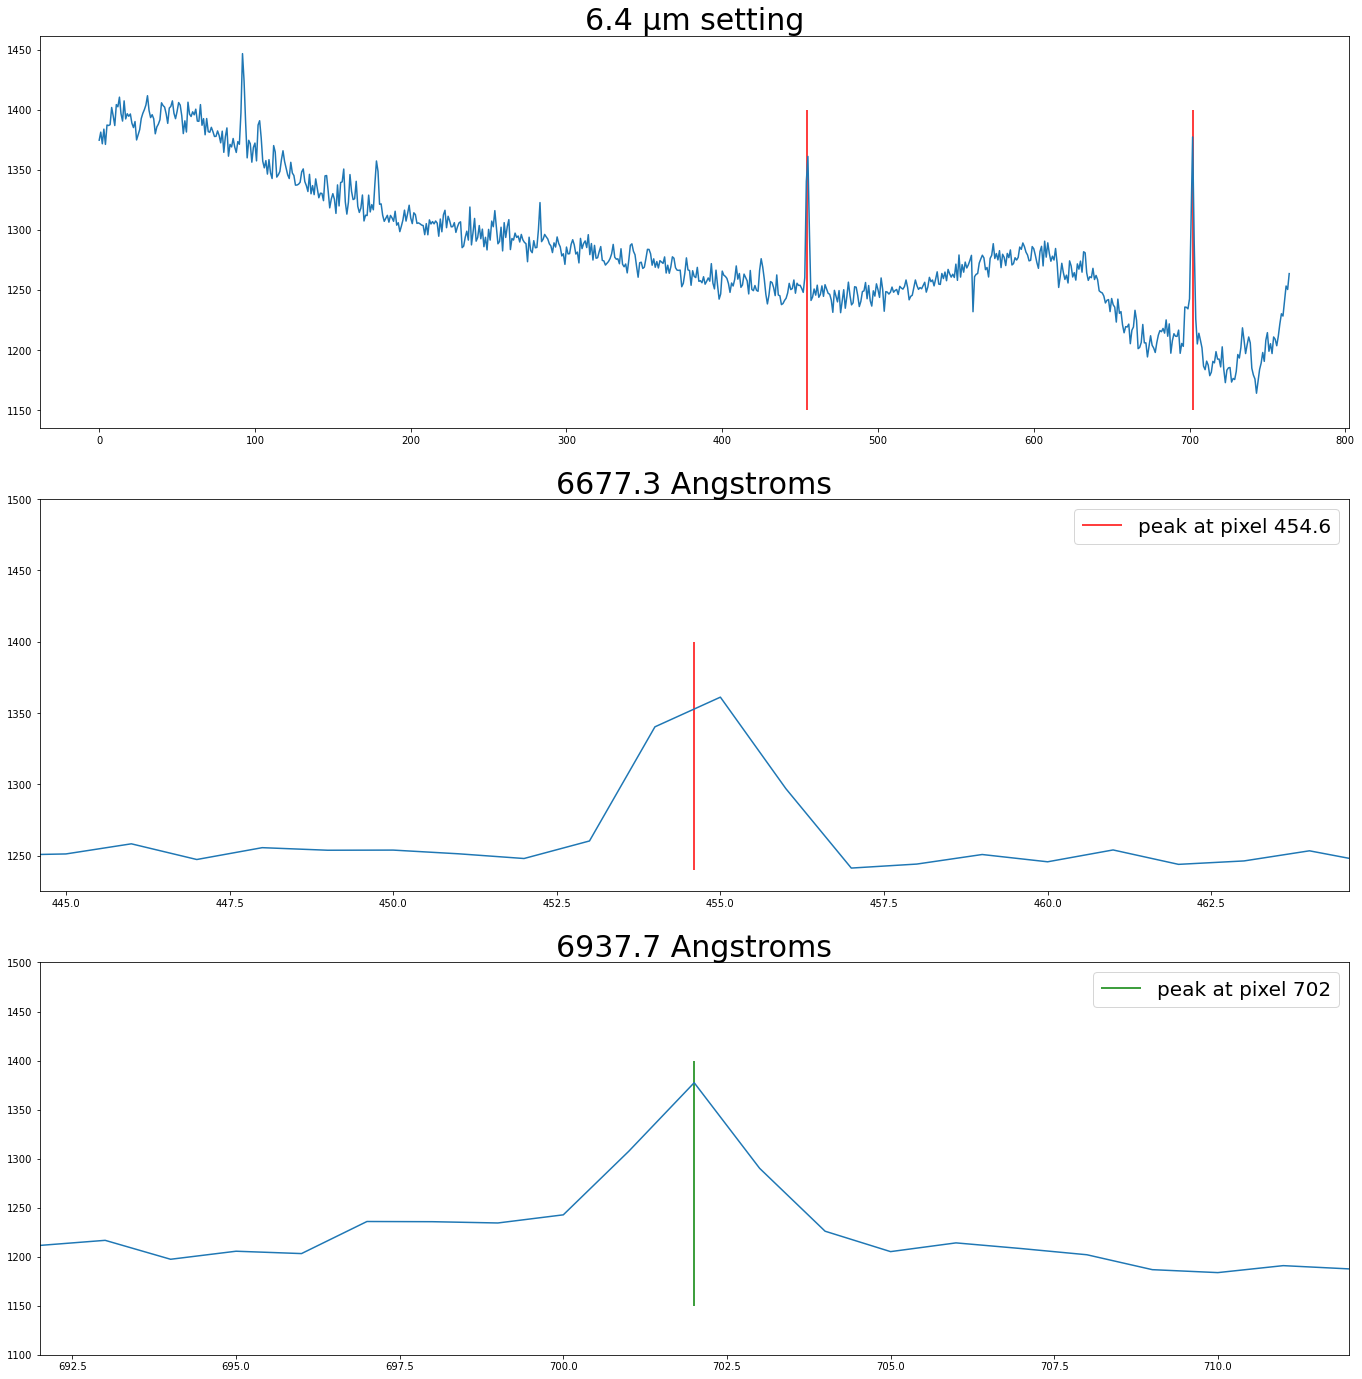

a is : 1.0525464834276461 , b is: 6198.812368633792
The spectrum runs from  6198.812368633792  angstroms to  7002.957881972514  angstroms


In [261]:
#Calibration for 6.4 µm
data = Hg_spectra[6]
p1 = 454.6
p2 = 702

line1 = 6677.3
line2 = 6937.7

fig, (ax0, ax1, ax2) = plt.subplots(3,1, figsize = (20, 20))
fig.tight_layout(pad=5)
ax0.plot(data) ; ax0.set_title(f'{Micrometer[6]} µm setting', fontsize = 30)
ax0.vlines(p1, 1150, 1400, colors = ['r', 'g'])
ax0.vlines(p2, 1150, 1400, colors = ['r', 'g'])

ax1.plot(data) ; ax1.set_title(f'{line1} Angstroms', fontsize=30)
ax1.vlines(p1, 1240, 1400, label =f'peak at pixel {p1}', color='r')
ax1.set_xlim(p1-10, p1+10)
ax1.set_ylim(1225, 1500)

ax2.plot(data) ; ax2.set_title(f'{line2} Angstroms', fontsize=30)
ax2.vlines(p2, 1150, 1400, label=f'peak at pixel {p2}', color ='g')
ax2.set_xlim(p2-10, p2+10)
ax2.set_ylim(1100, 1500)


ax1.legend(fontsize = 20)
ax2.legend(fontsize = 20)
plt.show()

a = (line1 - line2)/(p1-p2)
b = line1 - a*p1
print (f'a is : {a} , b is: {b}')

pixelvalues = np.arange(len(data))
wavelengthvalues = a*pixelvalues+b
print("The spectrum runs from ",np.amin(wavelengthvalues)," angstroms to ",np.amax(wavelengthvalues)," angstroms")

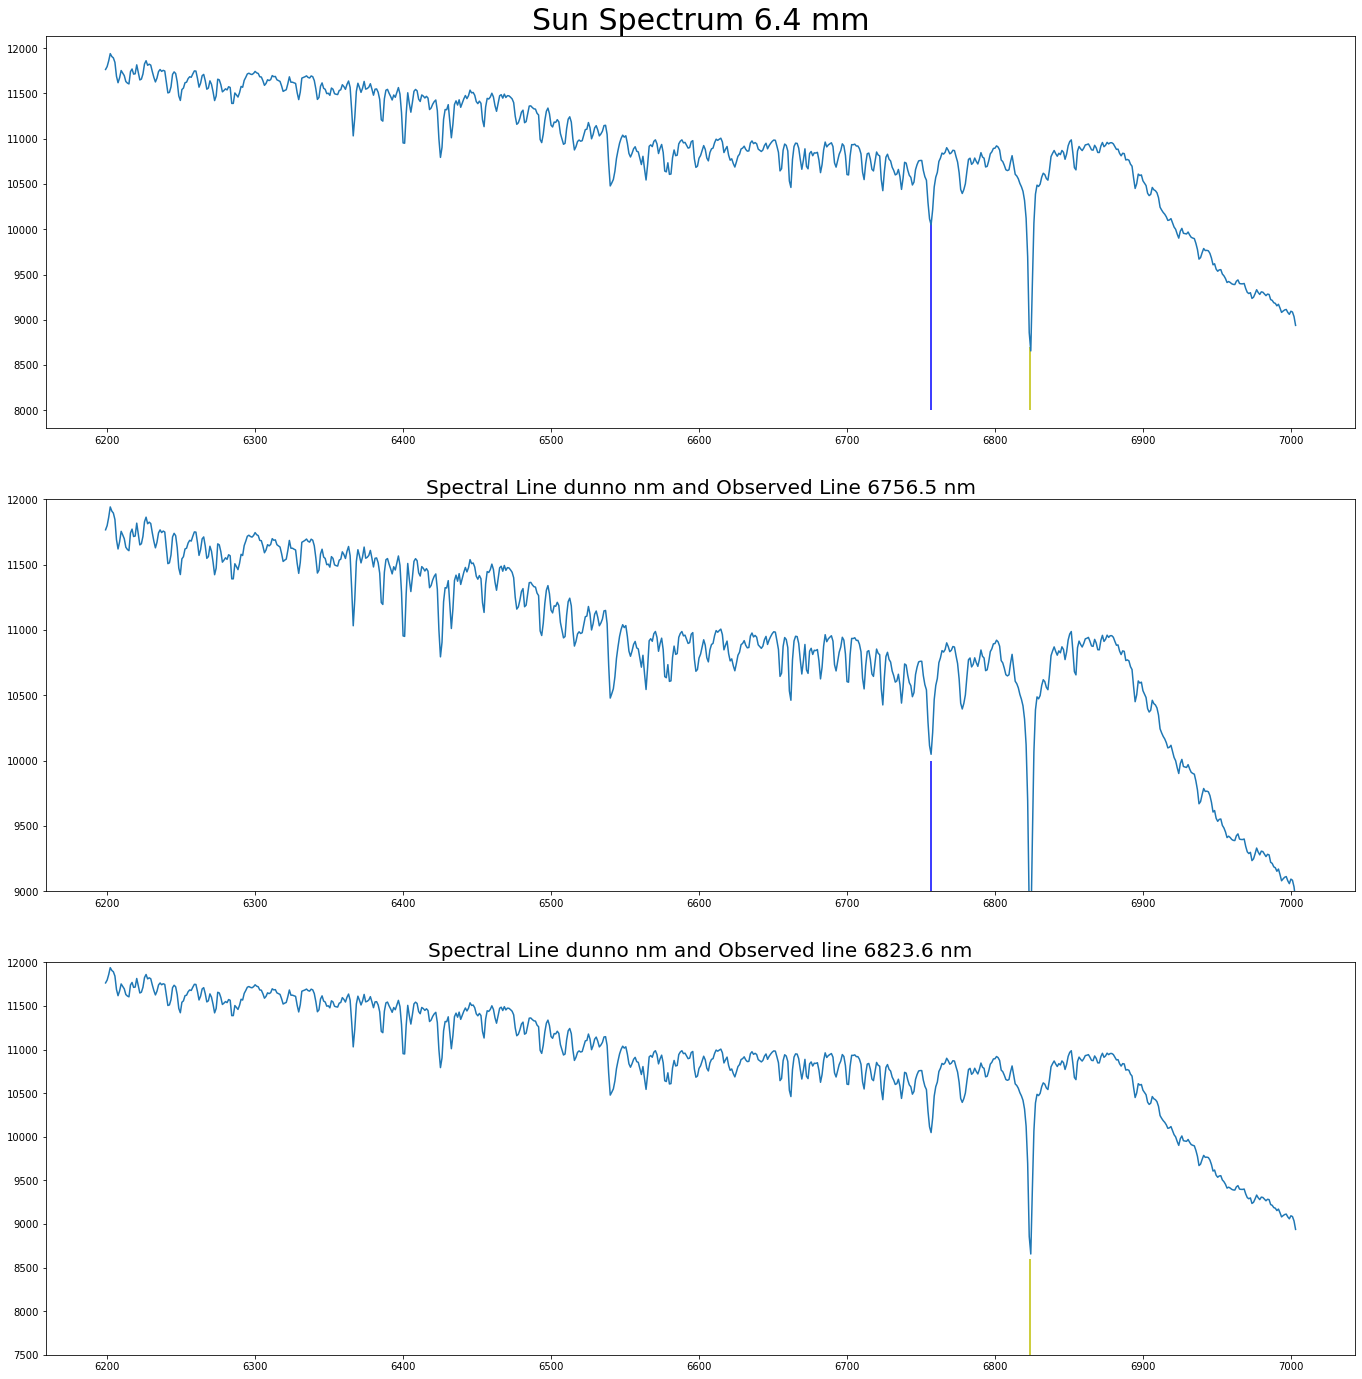

In [272]:
#Calibration for Sun Spectra 
data = Sun_spectra[6]

obs_line1 = 6756.5
obs_line2 = 6823.6
spectral1 = 'dunno'
spectral2 = 'dunno'

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 20))
fig.tight_layout(pad=5)
ax0.set_title(f'Sun Spectrum {Micrometer[6]} mm', fontsize=30)
ax0.plot(wavelengthvalues,data)
ax0.vlines(obs_line1, 8000, 10100, colors=  'b')
ax0.vlines(obs_line2, 8000, 8700, colors = 'y')

ax1.plot(wavelengthvalues,data);
ax1.set_title(f'Spectral Line {spectral1} nm and Observed Line {obs_line1} nm', fontsize=20)
ax1.vlines(obs_line1, 9000, 10000, colors='b')
#ax1.vlines(spectral1, 9000, 10000, colors='g')
#ax1.set_xlim((spectral1+obs_line1)/2 - 12, (spectral1+obs_line1)/2 +12)
#ax1.set_xticks(np.arange(25)+int(((spectral1+obs_line1)/2 -12)))
ax1.set_ylim(9000, 12000)

ax2.plot(wavelengthvalues,data);
ax2.set_title(f'Spectral Line {spectral1} nm and Observed line {obs_line2} nm', fontsize=20)
ax2.vlines(obs_line2, 7500, 8600, colors='y')
#ax2.vlines(spectral2, 7500, 8600, colors='g')
#ax2.set_xlim(((spectral2+obs_line2)/2 - 12),((spectral2+obs_line2)/2 +12))
#ax2.set_xticks(np.arange(25)+int(((spectral2 + obs_line2)/2-12)))
ax2.set_ylim(7500, 12000)

plt.show()

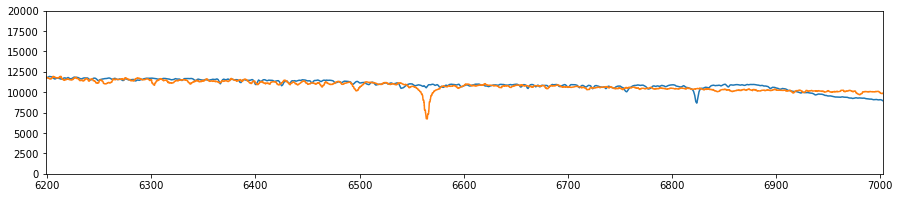

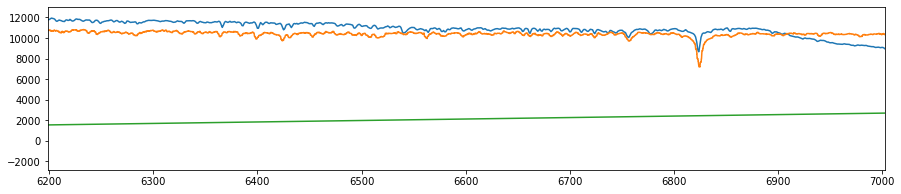

In [273]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/G2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,20000)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = 1.43
offset = 1550
rescale = 0.76

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0+260,flux_0_linear)
plt.plot(lambda_0,linear)
plt.show()

## 6.8 mm Micrometer setting

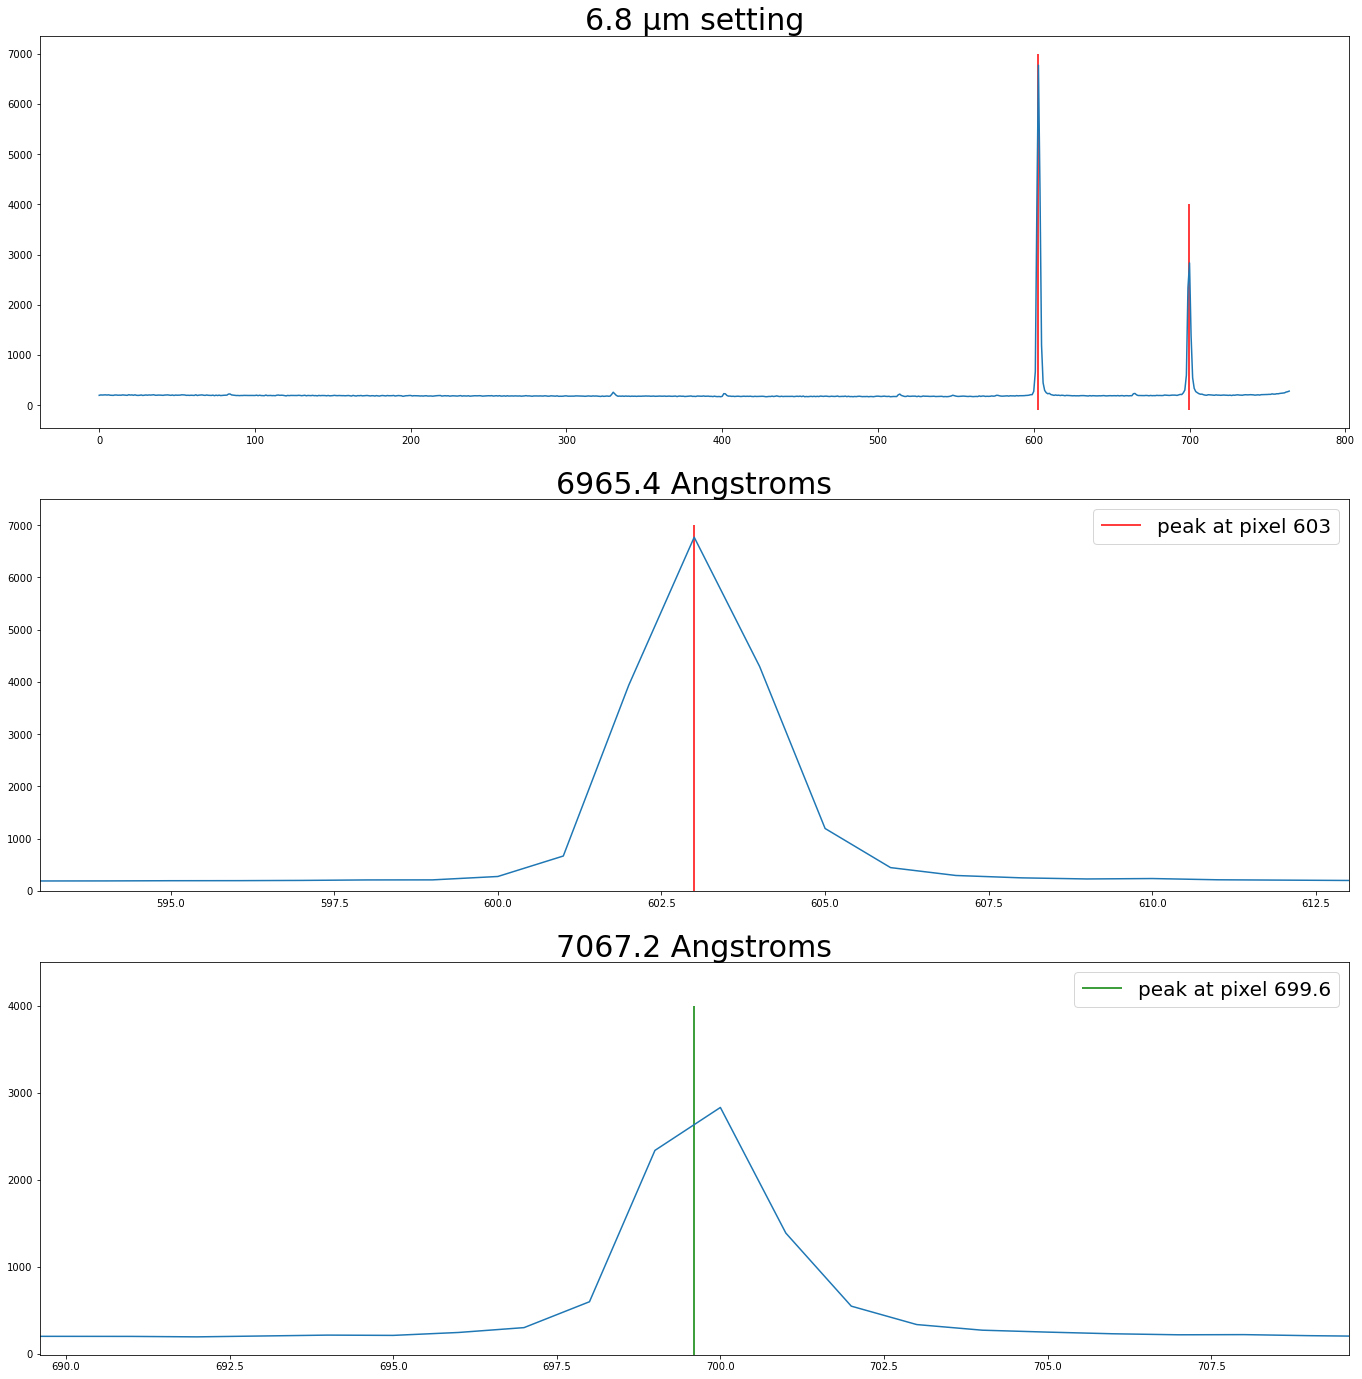

a is : 1.053830227743273 , b is: 6329.940372670806
The spectrum runs from  6329.940372670806  angstroms to  7135.066666666667  angstroms


In [274]:
#Calibration for 6.8 µm
data = Hg_spectra[7]
p1 = 603
p2 = 699.6

line1 = 6965.4
line2 = 7067.2

fig, (ax0, ax1, ax2) = plt.subplots(3,1, figsize = (20, 20))
fig.tight_layout(pad=5)
ax0.plot(data) ; ax0.set_title(f'{Micrometer[7]} µm setting', fontsize = 30)
ax0.vlines(p1, -100, 7000, colors = ['r', 'g'])
ax0.vlines(p2, -100, 4000, colors = ['r', 'g'])

ax1.plot(data) ; ax1.set_title(f'{line1} Angstroms', fontsize=30)
ax1.vlines(p1, -10, 7000, label =f'peak at pixel {p1}', color='r')
ax1.set_xlim(p1-10, p1+10)
ax1.set_ylim(-10, 7500)

ax2.plot(data) ; ax2.set_title(f'{line2} Angstroms', fontsize=30)
ax2.vlines(p2, -10, 4000, label=f'peak at pixel {p2}', color ='g')
ax2.set_xlim(p2-10, p2+10)
ax2.set_ylim(-10, 4500)


ax1.legend(fontsize = 20)
ax2.legend(fontsize = 20)
plt.show()

a = (line1 - line2)/(p1-p2)
b = line1 - a*p1
print (f'a is : {a} , b is: {b}')

pixelvalues = np.arange(len(data))
wavelengthvalues = a*pixelvalues+b
print("The spectrum runs from ",np.amin(wavelengthvalues)," angstroms to ",np.amax(wavelengthvalues)," angstroms")

TypeError: can only concatenate str (not "float") to str

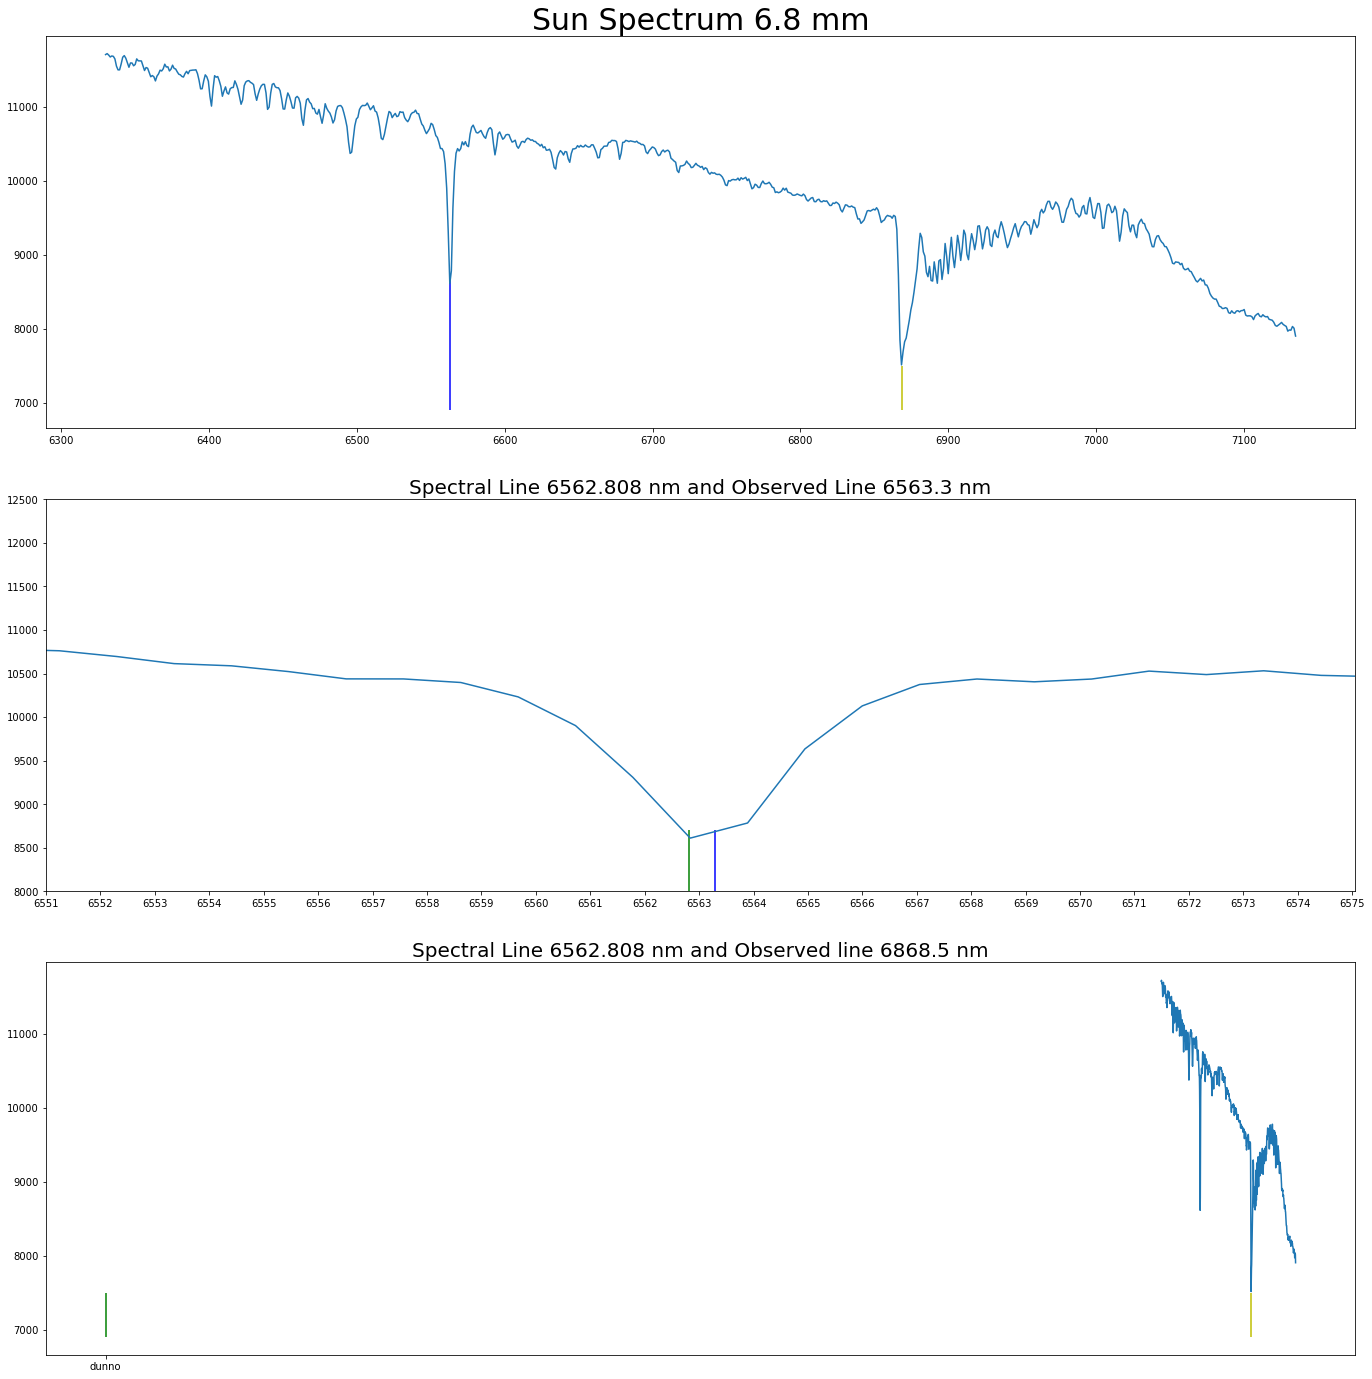

In [276]:
#Calibration for Sun Spectra 
data = Sun_spectra[7]

obs_line1 = 6563.3
obs_line2 = 6868.5
spectral1 = 6562.808
spectral2 = 'dunno'

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 20))
fig.tight_layout(pad=5)
ax0.set_title(f'Sun Spectrum {Micrometer[7]} mm', fontsize=30)
ax0.plot(wavelengthvalues,data)
ax0.vlines(obs_line1, 6900, 8700, colors=  'b')
ax0.vlines(obs_line2, 6900, 7500, colors = 'y')

ax1.plot(wavelengthvalues,data);
ax1.set_title(f'Spectral Line {spectral1} nm and Observed Line {obs_line1} nm', fontsize=20)
ax1.vlines(obs_line1, 8000, 8700, colors='b')
ax1.vlines(spectral1, 8000, 8700, colors='g')
ax1.set_xlim((spectral1+obs_line1)/2 - 12, (spectral1+obs_line1)/2 +12)
ax1.set_xticks(np.arange(25)+int(((spectral1+obs_line1)/2 -12)))
ax1.set_ylim(8000, 12500)

ax2.plot(wavelengthvalues,data);
ax2.set_title(f'Spectral Line {spectral1} nm and Observed line {obs_line2} nm', fontsize=20)
ax2.vlines(obs_line2, 6900, 7500, colors='y')
ax2.vlines(spectral2, 6900, 7500, colors='g')
ax2.set_xlim(((spectral2+obs_line2)/2 - 12),((spectral2+obs_line2)/2 +12))
ax2.set_xticks(np.arange(25)+int(((spectral2 + obs_line2)/2-12)))
ax2.set_ylim(6900, 12500)

plt.show()


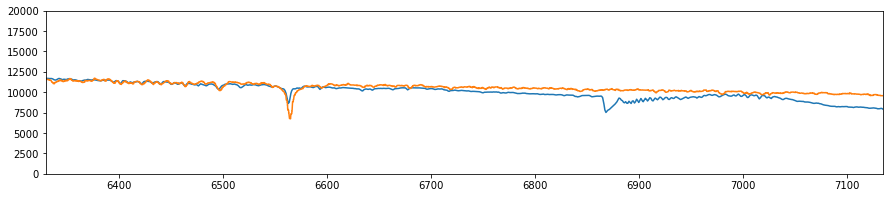

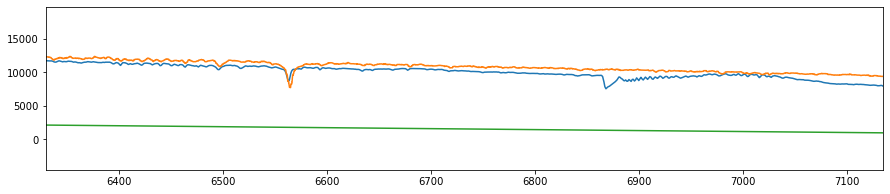

In [286]:
lambda_0 , flux_0 = get_model('/Users/shashank/SpectroscopyFolder/G2_+0.0_Dwarf.fits')#M2_+0.0_Dwarf.fits')

plotstart = np.max([lambda_0[0],wavelengthvalues[0]])
plotend =  np.min([lambda_0[-1],wavelengthvalues[-1]])

interpdat = np.interp(lambda_0,wavelengthvalues,data)

plt.xlim(plotstart,plotend)
plt.ylim(0,20000)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)

inrange = np.where((lambda_0 < plotend) & (lambda_0 > plotstart))
scale_model0 = flux_0*max(interpdat[inrange])/max(flux_0[inrange])
plt.plot(lambda_0,scale_model0)
plt.show()

slope = -1.44
offset = 2100
rescale = 0.88

distance = lambda_0 - plotstart
rescaled_model = scale_model0*rescale
linear = slope * distance + offset
flux_0_linear = rescaled_model + linear

plt.xlim(plotstart,plotend)
plt.rcParams["figure.figsize"] = (15,3)
plt.plot(lambda_0,interpdat)
plt.plot(lambda_0,flux_0_linear)
plt.plot(lambda_0,linear)
plt.show()